In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import re

# **Analysis on students mental health's influence on their performance and the factors that lead to stress, anxiety and depression in students.**

## **Introduction**

In recent years, the mental health of students has become a growing concern. The pressures of academic performance, social expectations, and the challenges of transitioning to adulthood have significantly impacted students' well-being. Issues such as anxiety, depression, and stress are increasingly common and can adversely affect academic outcomes, including cumulative grade point average (CGPA).Factors such as the year of study, field of study, age, gender and others may influence a student's mental health. For example, students in demanding fields like engineering or those nearing graduation might experience higher stress levels, which could impact their academic performance.

This project aims to explore the relationship between students' mental health and their academic success, focusing on how various factors(age, department, gender and others) affect mental health and how this mental health affects the performance of the students. Understanding these connections could be helpful for developing effective strategies to support students, ensuring they can achieve both mental and academic wellness.

## **Definitions**

## **1. Data Collection**
For the purpose of this analysis I will be using two datasets that contain information from surveys taken in universities in Bangladesh and Malaysia that aim to examine the student's mental health and how it influences their acadamic situation. The participant data is anonymized and the sets are free for use for research and educational purposes.
1. First dataset: University Students Mental Health, By:Mohsen Zergan, License: MIT, Name of file: Raw Data.csv, Link: https://www.kaggle.com/datasets/mohsenzergani/bangladeshi-university-students-mental-health
2. Second dataset: Student Mental health, By: MD Shariful Islam, License: CC0: Public Domain, Name of file: Student Mental health.csv, Link: https://www.kaggle.com/datasets/shariful07/student-mental-health

## **2. Working with data (Importing, Cleaning, Tidying and Understanding)**

I will work with the two datasets one by one to gain deeper understanding for both and to keep it cleaner and in order(not to mix up things) and then find all that connects them and choose what I need to use in order to answer my questions in this analysis.

### 2.1 Working with the first dataset(Raw Data.csv) which is the data from the surveys in Bangladesh 

1. Let's begin by importing the data using Pandas's read function and assign it to a variable that we will use to work with.

In [2]:
data_student_bangladesh = pd.read_csv('data/Raw Data.csv')

2. Now that we have loaded it and assigned it to a variable, let's call the variable to see the DataFrame and see what the data looks like.

In [3]:
data_student_bangladesh

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?",...,"2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,23-26,Male,Bangladesh Agricultural University (BAU),Biological Sciences,Fourth Year or Equivalent,3.40 - 3.79,No,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression
1973,23-26,Female,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.40 - 3.79,No,2,2,2,...,2,1,2,1,0,1,1,0,9,Mild Depression
1974,23-26,Female,Bangladesh Agricultural University (BAU),Biological Sciences,Other,3.80 - 4.00,No,1,0,1,...,3,3,3,3,3,3,1,0,22,Severe Depression
1975,23-26,Male,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.00 - 3.39,No,1,1,1,...,1,1,2,2,1,2,2,0,11,Moderate Depression


3. As we can see we have 1997 observations(rows) and 39 features(columns). From first sight the data looks okay, but the column names need to be changed as we cannot work with names like these nor it looks good or well structured to have whole questions for column names. I will check all the names of the columns and map the names to shorter identifiers while I also make a guide that states the original column names and their new identifiers. After we do that it will be easier to work with the columns and continue cleaning and tidying the whole set.

5. Let's check all column names and decide how to rename them.

In [4]:
data_student_bangladesh.columns

Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ',
       '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ',
       '3. In a semester, how often have you had trouble relaxing due to academic pressure? ',
       '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?',
       '5. In a semester, how often have you worried too much about academic affairs? ',
       '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?',
       '7. In a semester, how often have you felt afraid, as if something awful might happen?',
       'Anxiety Value', 'Anxiety Label',
       '1. In a semester, how often have you felt upset due

5. After checking the column names I decided to identify them manually because I want to know exactly what I named them, there could be a function to extract words out of the sentence and use that but I decided the columns aren't that much and I want to map them manually.
- "1. Age" : "Age"
- "2. Gender" : "Gender"
- "3. University" : "University"
- "4. Department" : "Department"
- "5. Academic Year" : "Academic Year"
- "6. Current CGPA" : "Current CGPA"
- '7. Did you receive a waiver or scholarship at your university?' : 'Scholarship'
- '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ' : 'Nervous'
- '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ' : 'Worrying'
- '3. In a semester, how often have you had trouble relaxing due to academic pressure? ' : 'Trouble Relaxing '
- '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?' : 'Easily Annoyed'
- '5. In a semester, how often have you worried too much about academic affairs? ' : 'Excessive Worry '
- '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?' : 'Restless'
- '7. In a semester, how often have you felt afraid, as if something awful might happen?' : 'Fearful '
- 'Anxiety Value' : 'Anxiety Value'
- 'Anxiety Label' : 'Anxiety Label'
- '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ' : 'Upset'
- '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?' : 'Lack of Control'
- '3. In a semester, how often you felt nervous and stressed because of academic pressure? ' : 'Nervous or Stressed '
- '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ' : 'Inadequate Coping'
- '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?' : 'Confident'
- '6. In a semester, how often you felt as if things in your academic life is going on your way? ' : 'Things Going Well'
- '7. In a semester, how often are you able to control irritations in your academic / university affairs? ' : 'Control Irritations'
- '8. In a semester, how often you felt as if your academic performance was on top?' : 'Top Performance'
- '9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control? ' : 'Angered by Performance'
- '10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them? ' : 'Overwhelmed'
- 'Stress Value' : 'Stress Value'
- 'Stress Label' : 'Stress Label'
- '1. In a semester, how often have you had little interest or pleasure in doing things?' : 'Lack of Interest'
- '2. In a semester, how often have you been feeling down, depressed or hopeless?' : 'Feeling Down'
- '3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much? ' : 'Sleep Issues'
- '4. In a semester, how often have you been feeling tired or having little energy? ' : 'Fatigue'
- '5. In a semester, how often have you had poor appetite or overeating? ' : 'Appetite Issues'
- '6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down? ' : 'Self-Doubt'
- '7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television? ' : 'Concentration Issues'
- '8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you\'ve been moving a lot more than usual because you\'ve been restless? ' : 'Movement Issues'
- '9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself? ' : 'Suicidal Thoughts'
- "Depression Value" : "Depression Value"
- "Depression Label" : "Depression Label"

6. Now let's create a dictionary that we are gonna use to map the original column names to shorter and more descriptive names. In a dictionary each key represents an original column name, and each value represents the new, more readable name you want to assign to that column.
- ! We should note that Depression Value, Anxiety Value and Stress Value are the sum of the points from the previous questions. For example Anxiety Value 11 means we have sum of 11 points from all 7 questions before it, counting them from 1.In a semester, how often you felt nervous, anxious or on edge due to academic pressure? to 7. In a semester, how often have you felt afraid, as if something awful might happen? Based on the result we have different labels from minimal to severe.


In [5]:
column_mapping = {
    "1. Age":"Age",
    "2. Gender":"Gender",
    "3. University":"University",
    "4. Department":"Department",
    "5. Academic Year":"Academic Year",
    "6. Current CGPA":"Current Cgpa",
    '7. Did you receive a waiver or scholarship at your university?': 'Scholarship',
    '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ': 'Nervous',
    '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ': 'Worrying',
    '3. In a semester, how often have you had trouble relaxing due to academic pressure? ': 'Trouble Relaxing ',
    '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?': 'Easily Annoyed',
    '5. In a semester, how often have you worried too much about academic affairs? ': 'Excessive Worry ',
    '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?': 'Restless',
    '7. In a semester, how often have you felt afraid, as if something awful might happen?': 'Fearful ',
    'Anxiety Value': 'Anxiety Value',
    'Anxiety Label': 'Anxiety Label',
    '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ': 'Upset',
    '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?': 'Lack of Control',
    '3. In a semester, how often you felt nervous and stressed because of academic pressure? ': 'Nervous or Stressed ',
    '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ': 'Inadequate Coping',
    '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?': 'Confident',
    '6. In a semester, how often you felt as if things in your academic life is going on your way? ': 'Things Going Well',
    '7. In a semester, how often are you able to control irritations in your academic / university affairs? ': 'Control Irritations',
    '8. In a semester, how often you felt as if your academic performance was on top?': 'Top Performance',
    '9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control? ': 'Angered by Performance',
    '10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them? ': 'Overwhelmed',
    'Stress Value': 'Stress Value',
    'Stress Label': 'Stress Label',
    '1. In a semester, how often have you had little interest or pleasure in doing things?': 'Lack of Interest',
    '2. In a semester, how often have you been feeling down, depressed or hopeless?': 'Feeling Down',
    '3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much? ': 'Sleep Issues',
    '4. In a semester, how often have you been feeling tired or having little energy? ': 'Fatigue',
    '5. In a semester, how often have you had poor appetite or overeating? ': 'Appetite Issues',
    '6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down? ': 'Self Doubt',
    '7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television? ': 'Concentration Issues',
    '8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you\'ve been moving a lot more than usual because you\'ve been restless? ': 'Movement Issues',
    '9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself? ': 'Suicidal Thoughts',
    "Depression Value":"Depression Value",
    "Depression Label":"Depression Label"
}


7. Now let's rename the columns using **.rename** that takes the original column names and replaces them with the dictionary I created

In [6]:
data_student_bang_renamed_columns = data_student_bangladesh.rename(columns=column_mapping)

8. Let's check the renamed columns

In [7]:
data_student_bang_renamed_columns

,Age,Gender,University,Department,Academic Year,Current Cgpa,Scholarship,Nervous,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,23-26,Male,Bangladesh Agricultural University (BAU),Biological Sciences,Fourth Year or Equivalent,3.40 - 3.79,No,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression
1973,23-26,Female,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.40 - 3.79,No,2,2,2,...,2,1,2,1,0,1,1,0,9,Mild Depression
1974,23-26,Female,Bangladesh Agricultural University (BAU),Biological Sciences,Other,3.80 - 4.00,No,1,0,1,...,3,3,3,3,3,3,1,0,22,Severe Depression
1975,23-26,Male,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.00 - 3.39,No,1,1,1,...,1,1,2,2,1,2,2,0,11,Moderate Depression


9. They look good now but still we will convert them to **snake_case** so that we can easily use the column names.
10. Let's create a function that converts the column names to snake_case

In [8]:
def convert_to_snake_case(column_name):
    """
    Convert a string to snake_case.

    Parameters:
    column_name (str): The original column name.

    Returns:
    str: The column name converted to snake_case.
    """
    # Replace spaces or special characters with underscores
    snake_case_name = re.sub(r'[\W\s]+', '_', column_name)
    
    # Convert CamelCase to snake_case
    snake_case_name = re.sub(r'(?<!^)(?=[A-Z])', '_', snake_case_name)
    
    # Convert to lowercase
    snake_case_name = snake_case_name.lower()
    
    # Replace multiple underscores with a single underscore
    snake_case_name = re.sub(r'_+', '_', snake_case_name)
    
    # Remove any leading or trailing underscores
    snake_case_name = snake_case_name.strip('_')
    
    return snake_case_name

def rename_columns_to_snake_case(df):
    """
    Rename all columns in a DataFrame to snake_case.

    Parameters:
    df (pd.DataFrame): The DataFrame whose columns need to be renamed.

    Returns:
    pd.DataFrame: A new DataFrame with columns renamed to snake_case.
    """
    # Generate a mapping of original column names to snake_case names
    column_mapping = {col: convert_to_snake_case(col) for col in df.columns}
    
    # Rename the columns using the mapping and return the new DataFrame
    df_snake_case = df.rename(columns=column_mapping)
    
    return df_snake_case

11. Let's assign a new variable for the new snake_case columns so that we preserve the previous versions of our set and see what it looks like.

In [9]:
data_student_bang_snake_case = rename_columns_to_snake_case(data_student_bang_renamed_columns)

In [10]:
data_student_bang_snake_case

,age,gender,university,department,academic_year,current_cgpa,scholarship,nervous,worrying,trouble_relaxing,...,feeling_down,sleep_issues,fatigue,appetite_issues,self_doubt,concentration_issues,movement_issues,suicidal_thoughts,depression_value,depression_label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,23-26,Male,Bangladesh Agricultural University (BAU),Biological Sciences,Fourth Year or Equivalent,3.40 - 3.79,No,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression
1973,23-26,Female,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.40 - 3.79,No,2,2,2,...,2,1,2,1,0,1,1,0,9,Mild Depression
1974,23-26,Female,Bangladesh Agricultural University (BAU),Biological Sciences,Other,3.80 - 4.00,No,1,0,1,...,3,3,3,3,3,3,1,0,22,Severe Depression
1975,23-26,Male,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.00 - 3.39,No,1,1,1,...,1,1,2,2,1,2,2,0,11,Moderate Depression


In [11]:
data_student_bang_snake_case.columns

Index(['age', 'gender', 'university', 'department', 'academic_year',
       'current_cgpa', 'scholarship', 'nervous', 'worrying',
       'trouble_relaxing', 'easily_annoyed', 'excessive_worry', 'restless',
       'fearful', 'anxiety_value', 'anxiety_label', 'upset', 'lack_of_control',
       'nervous_or_stressed', 'inadequate_coping', 'confident',
       'things_going_well', 'control_irritations', 'top_performance',
       'angered_by_performance', 'overwhelmed', 'stress_value', 'stress_label',
       'lack_of_interest', 'feeling_down', 'sleep_issues', 'fatigue',
       'appetite_issues', 'self_doubt', 'concentration_issues',
       'movement_issues', 'suicidal_thoughts', 'depression_value',
       'depression_label'],
      dtype='object')

12. Now the columns are ready to be easily used and called so we shall continue ownard with the exploration and cleaning.
13. Let's check the datatypes of the columns and see whether they are in their appropriate data types.

In [12]:
data_student_bang_snake_case.dtypes

age                       object
gender                    object
university                object
department                object
academic_year             object
current_cgpa              object
scholarship               object
nervous                    int64
worrying                   int64
trouble_relaxing           int64
easily_annoyed             int64
excessive_worry            int64
restless                   int64
fearful                    int64
anxiety_value              int64
anxiety_label             object
upset                      int64
lack_of_control            int64
nervous_or_stressed        int64
inadequate_coping          int64
confident                  int64
things_going_well          int64
control_irritations        int64
top_performance            int64
angered_by_performance     int64
overwhelmed                int64
stress_value               int64
stress_label              object
lack_of_interest           int64
feeling_down               int64
sleep_issu

14. As we can see the columns age, academic_year, current_cgpa are of type objects, I expected them to be integers. Let's see each column's unique values and their counts, for this I will create a function to display them for all columns

In [13]:
def display_unique_values_and_counts(df):
    """
    Display unique values and their counts for each column in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame whose columns will be analyzed.
    
    Returns:
    None
    """
    for column in df.columns:
        print(f"Column: {column}")
        print(df[column].value_counts())
        print("-" * 50)  # Separator for readability


display_unique_values_and_counts(data_student_bang_snake_case)

Column: age
age
18-22       1273
23-26        673
27-30         24
Below 18       4
Above 30       3
Name: count, dtype: int64
--------------------------------------------------
Column: gender
gender
Male                 1372
Female                595
Prefer not to say      10
Name: count, dtype: int64
--------------------------------------------------
Column: university
university
Independent University, Bangladesh (IUB)                      584
American International University Bangladesh (AIUB)           529
Islamic University of Technology (IUT)                        278
Dhaka University (DU)                                         202
Dhaka University of Engineering and Technology (DUET)         164
North South University (NSU)                                   91
Patuakhali Science and Technology University                   36
Bangladesh University of Engineering and Technology (BUET)     32
East West University (EWU)                                     19
Rajshahi University o

14. We can see that the columns age and cgpa are ranges, they are not exact number but a range from one number to other and the column academic year is a string of the academic year. We can eventually exchange the ranges with the meadian or mean and replace the string with the equivalent int number if and when we need to make numerical analysis.
15. Also there are options called "Other" or "Preffer not to say", these data entries don't give us any valuable information about our analysis as we cannot guess for example in cgpa, what does the Other option mean in numbers, is it a bad score, a good one. Using Other will be just us guessing what the information behind it means.
16. Let's first see if there are any NaN values in the set

In [14]:
data_student_bang_snake_case.isnull().sum()

age                       0
gender                    0
university                0
department                0
academic_year             0
current_cgpa              0
scholarship               0
nervous                   0
worrying                  0
trouble_relaxing          0
easily_annoyed            0
excessive_worry           0
restless                  0
fearful                   0
anxiety_value             0
anxiety_label             0
upset                     0
lack_of_control           0
nervous_or_stressed       0
inadequate_coping         0
confident                 0
things_going_well         0
control_irritations       0
top_performance           0
angered_by_performance    0
overwhelmed               0
stress_value              0
stress_label              0
lack_of_interest          0
feeling_down              0
sleep_issues              0
fatigue                   0
appetite_issues           0
self_doubt                0
concentration_issues      0
movement_issues     

17. As we can see thaere are 0 NaN values which is great and it means we don't need to clean them or replace them with something like a mean or flag them for further analysis.
18. We can now remove the data with unique value (Other or Preffer not to say). Let's write a function to remove these entries from these exact columns.

In [15]:
def remove_specific_entries(df):
    """
    Removes rows from the DataFrame where:
    - gender is "Prefer not to say"
    - department is "Other"
    - academic_year is "Other"
    - current_cgpa is "Other"
    - age is "Below 18" or "Above 30"
    
    Parameters:
    df (pd.DataFrame): The DataFrame to clean.
    
    Returns:
    pd.DataFrame: A cleaned DataFrame with specific entries removed.
    """
    # Applying precise conditions to remove unwanted rows
    cleaned_df = df[
        (df['gender'] != 'Prefer not to say') & 
        (df['department'] != 'Other') & 
        (df['academic_year'] != 'Other') & 
        (df['current_cgpa'] != 'Other') & 
        (df['age'] != 'Below 18') & 
        (df['age'] != 'Above 30')
    ].copy()
    
    return cleaned_df

# Assuming 'data_student_bang_snake_case' is your DataFrame
# Apply the cleaning function and save the result in a new variable
cleaned_student_data = remove_specific_entries(data_student_bang_snake_case)

# Check the result
print("Original DataFrame shape:", data_student_bang_snake_case.shape)
print("Cleaned DataFrame shape:", cleaned_student_data.shape)
print(cleaned_student_data['gender'].value_counts())
print(cleaned_student_data['department'].value_counts())
print(cleaned_student_data['academic_year'].value_counts())
print(cleaned_student_data['current_cgpa'].value_counts())
print(cleaned_student_data['age'].value_counts())

Original DataFrame shape: (1977, 39)
Cleaned DataFrame shape: (1663, 39)
gender
Male      1173
Female     490
Name: count, dtype: int64
department
Engineering - CS / CSE / CSC / Similar to CS            1229
Business and Entrepreneurship Studies                    112
Engineering - EEE/ ECE / Similar to EEE                   95
Biological Sciences                                       92
Engineering - Mechanical Engineering / Similar to ME      47
Environmental and Life Sciences                           43
Engineering - Civil Engineering / Similar to CE           39
Engineering - Other                                        4
Pharmacy and Public Health                                 1
Liberal Arts and Social Sciences                           1
Name: count, dtype: int64
academic_year
Third Year or Equivalent     522
First Year or Equivalent     426
Fourth Year or Equivalent    371
Second Year or Equivalent    344
Name: count, dtype: int64
current_cgpa
3.00 - 3.39    511
3.40 - 3.79  

In [16]:
cleaned_student_data 

,age,gender,university,department,academic_year,current_cgpa,scholarship,nervous,worrying,trouble_relaxing,...,feeling_down,sleep_issues,fatigue,appetite_issues,self_doubt,concentration_issues,movement_issues,suicidal_thoughts,depression_value,depression_label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.40 - 3.79,No,2,3,2,...,1,1,2,2,1,2,2,2,14,Moderate Depression
1969,23-26,Male,East West University (EWU),Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,Yes,2,2,2,...,3,3,3,3,3,1,2,0,20,Severe Depression
1970,23-26,Male,Bangladesh Agricultural University (BAU),Biological Sciences,Fourth Year or Equivalent,3.80 - 4.00,No,1,1,3,...,1,1,0,0,1,1,1,0,5,Mild Depression
1972,23-26,Male,Bangladesh Agricultural University (BAU),Biological Sciences,Fourth Year or Equivalent,3.40 - 3.79,No,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression


19. Okay now that we have removed the non-informative data let's map the ranges in the age and current_cgpa columns to a mean or meadian int and map the string in academic year to its equivalent integer number. Let's create a dictionary to map the values

In [17]:
Academic_year_mapping ={
    'Fourth Year or Equivalent': 4,
    'First Year or Equivalent': 1,
    'Third Year or Equivalent': 3,
    'Second Year or Equivalent': 2,
}

age_mapping = {   
    '18-22': 20, 
    '23-26': 25,       
    '27-30': 28   
}

cgpa_mapping = {
    'Below 2.50': 2.0,     
    '2.50 - 2.99': 2.75,  
    '3.00 - 3.39': 3.20,   
    '3.40 - 3.79': 3.60,   
    '3.80 - 4.00': 3.90,      
}

department_mapping = {
    'Engineering - CS / CSE / CSC / Similar to CS': 'CS/IT Engineering',
    'Liberal Arts and Social Sciences': 'Social Science',
    'Engineering - EEE/ ECE / Similar to EEE': 'EEE/ECE Engineering',
    'Environmental and Life Sciences': 'Env/Life Sciences',
    'Business and Entrepreneurship Studies': 'Business/Entrepreneurship',
    'Biological Sciences': 'Biological Sciences',
    'Engineering - Civil Engineering / Similar to CE': 'Civil Engineering',
    'Engineering - Mechanical Engineering / Similar to ME': 'Mechanical Engineering',
    'Pharmacy and Public Health' : 'Pharmacy',
}




cleaned_student_data ['department'] = cleaned_student_data ['department'].map(department_mapping) 
cleaned_student_data ['academic_year'] = cleaned_student_data ['academic_year'].map(Academic_year_mapping)
cleaned_student_data ['age'] = cleaned_student_data ['age'].map(age_mapping)
cleaned_student_data ['current_cgpa'] = cleaned_student_data ['current_cgpa'].map(cgpa_mapping)

In [18]:
cleaned_student_data

,age,gender,university,department,academic_year,current_cgpa,scholarship,nervous,worrying,trouble_relaxing,...,feeling_down,sleep_issues,fatigue,appetite_issues,self_doubt,concentration_issues,movement_issues,suicidal_thoughts,depression_value,depression_label
0,20,Female,"Independent University, Bangladesh (IUB)",CS/IT Engineering,4,2.75,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,20,Male,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.90,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,20,Male,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.20,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,20,Male,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.60,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,20,Male,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.60,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,20,Male,American International University Bangladesh (...,CS/IT Engineering,3,3.60,No,2,3,2,...,1,1,2,2,1,2,2,2,14,Moderate Depression
1969,25,Male,East West University (EWU),CS/IT Engineering,4,2.75,Yes,2,2,2,...,3,3,3,3,3,1,2,0,20,Severe Depression
1970,25,Male,Bangladesh Agricultural University (BAU),Biological Sciences,4,3.90,No,1,1,3,...,1,1,0,0,1,1,1,0,5,Mild Depression
1972,25,Male,Bangladesh Agricultural University (BAU),Biological Sciences,4,3.60,No,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression


20. Now let's convert **Male** and **Female** to **0(Male)** and **1(Female)** so that we could analyse it later and also for **Scholarship** **(0) No** and **(1) Yes**

In [19]:
def convert_gender_and_scholarship(df):
    """
    Converts the 'gender' column to 0 for 'Male' and 1 for 'Female', and 
    the 'scholarship' column to 0 for 'No' and 1 for 'Yes'.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to convert.
    
    Returns:
    pd.DataFrame: The DataFrame with converted columns.
    """
    # Convert gender: 'Male' -> 0, 'Female' -> 1
    df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)
    
    # Convert scholarship: 'No' -> 0, 'Yes' -> 1
    df['scholarship'] = df['scholarship'].map({'No': 0, 'Yes': 1}).astype(int)
    
    return df

# Assuming 'cleaned_student_data' is your DataFrame after cleaning
# Apply the conversion function
converted_cleaned_student_data = convert_gender_and_scholarship(cleaned_student_data)


In [20]:
converted_cleaned_student_data

,age,gender,university,department,academic_year,current_cgpa,scholarship,nervous,worrying,trouble_relaxing,...,feeling_down,sleep_issues,fatigue,appetite_issues,self_doubt,concentration_issues,movement_issues,suicidal_thoughts,depression_value,depression_label
0,20,1,"Independent University, Bangladesh (IUB)",CS/IT Engineering,4,2.75,0,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,20,0,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.90,0,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,20,0,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.20,0,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,20,0,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.60,0,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,20,0,"Independent University, Bangladesh (IUB)",CS/IT Engineering,1,3.60,0,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,20,0,American International University Bangladesh (...,CS/IT Engineering,3,3.60,0,2,3,2,...,1,1,2,2,1,2,2,2,14,Moderate Depression
1969,25,0,East West University (EWU),CS/IT Engineering,4,2.75,1,2,2,2,...,3,3,3,3,3,1,2,0,20,Severe Depression
1970,25,0,Bangladesh Agricultural University (BAU),Biological Sciences,4,3.90,0,1,1,3,...,1,1,0,0,1,1,1,0,5,Mild Depression
1972,25,0,Bangladesh Agricultural University (BAU),Biological Sciences,4,3.60,0,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression


In [21]:
new_file_path = 'cleaned_student_mental_health_bang.csv' 
converted_cleaned_student_data.to_csv(new_file_path, index=False)

In [22]:
converted_cleaned_student_data.dtypes

age                         int64
gender                      int32
university                 object
department                 object
academic_year               int64
current_cgpa              float64
scholarship                 int32
nervous                     int64
worrying                    int64
trouble_relaxing            int64
easily_annoyed              int64
excessive_worry             int64
restless                    int64
fearful                     int64
anxiety_value               int64
anxiety_label              object
upset                       int64
lack_of_control             int64
nervous_or_stressed         int64
inadequate_coping           int64
confident                   int64
things_going_well           int64
control_irritations         int64
top_performance             int64
angered_by_performance      int64
overwhelmed                 int64
stress_value                int64
stress_label               object
lack_of_interest            int64
feeling_down  

21. As we can see the data is now ready for analysis with the non-informative data being removed, columns renamed and easy to use, values which were supposed to be numerical for analyis are now numerical indeed and there are 0 NaN values. Which means the data is ready to be analysed.
22. But before we go and work on the second dataset file let's just see what the range is for levels of stress, depression and anxiety and what label does it have, just for our information.

In [23]:
def inspect_value_ranges(df, value_column, label_column):
    """
    Inspects and prints the unique values and their corresponding labels for a given
    pair of value and label columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to inspect.
    value_column (str): The column name for the values (e.g., 'anxiety_value').
    label_column (str): The column name for the labels (e.g., 'anxiety_label').

    Returns:
    dict: A dictionary mapping each label to the range of values associated with it.
    """
    # Group by the label column and find the range of values for each label
    grouped = df.groupby(label_column)[value_column].agg(['min', 'max']).reset_index()
    
    # Convert to a dictionary for easy access
    ranges = {row[label_column]: (row['min'], row['max']) for _, row in grouped.iterrows()}
    
    # Print out the ranges
    print(f"Ranges for {label_column}:")
    for label, (min_val, max_val) in ranges.items():
        print(f"{label}: {min_val} to {max_val}")
    
    return ranges

# Assuming 'cleaned_student_data' is your DataFrame after cleaning
# Inspect anxiety values and labels
anxiety_ranges = inspect_value_ranges(converted_cleaned_student_data, 'anxiety_value', 'anxiety_label')

# Inspect depression values and labels
depression_ranges = inspect_value_ranges(converted_cleaned_student_data, 'depression_value', 'depression_label')

# Inspect stress values and labels
stress_ranges = inspect_value_ranges(converted_cleaned_student_data, 'stress_value', 'stress_label')

Ranges for anxiety_label:
Mild Anxiety: 5 to 9
Minimal Anxiety: 0 to 4
Moderate Anxiety: 10 to 14
Severe Anxiety: 15 to 21
Ranges for depression_label:
Mild Depression: 5 to 9
Minimal Depression: 1 to 4
Moderate Depression: 10 to 14
Moderately Severe Depression: 15 to 19
No Depression: 0 to 0
Severe Depression: 20 to 27
Ranges for stress_label:
High Perceived Stress: 27 to 40
Low Stress: 0 to 13
Moderate Stress: 14 to 26


23. Now we know what to expect from the numerical values and what they are labeled as.
24. Now we may continue with working with the second dataset
25. Let's first save another csv only with certain columns to explore myself

In [24]:
# List the columns you want to keep
columns_to_keep = ['gender', 'age', 'academic_year', 'current_cgpa', 'depression_label', 'anxiety_label', 'stress_label']

# Create a new DataFrame with only the selected columns
df_selected = converted_cleaned_student_data[columns_to_keep]

In [25]:
df_selected.to_csv('columns.csv', index=False)

### 2.2 Working with the second dataset(Student Mental health.csv) which is the data from the surveys in Malaysia 

1. Now let's import the data using the pandas .read functuion

In [26]:
data_student_malaysia = pd.read_csv('data/Student Mental health.csv')

In [27]:
data_student_malaysia

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


2. As we can see we have 101 observations (rows) and 11 features (columns)
3. Let's check the columns(names and how to rename them, data types and missing values)

In [28]:
data_student_malaysia.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

4. As we can see there will be work on the names of the columns, we need to convert them to snake_case and rename some names to shorter and more understandable identifiers.
5. Also we can remove the timestamp column.
6. Let's see the datatypes and check whether there are any NaN values

In [29]:
data_student_malaysia.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

7. From here we can see there is something off with the Age column, the year of study and cgpa also look off as they should be int.
8. Let's see if it's down to NaN value that the Age column is float and whether there are other NaN values.

In [30]:
data_student_malaysia.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

9. As we can see the problem is exactly in the Age column, so we shall remove it and covert it to int
10. Okay let's first begin by renaming the columns, then we will clean it more easily
- "Choose your gender":"Gender",
- "What is your course?":"Course",
- "Your current year of Study":"Year",
- "What is your CGPA?":"Cgpa",
- "Do you have Depression?":"Depression",
- "Do you have Anxiety?":"Anxiety",
- "Do you have Panic attack":"Panic",
- "Did you seek any specialist for a treatment":"Treatment",

In [31]:
column_mapping = {
    "Choose your gender":"Gender",
    "What is your course?":"Course",
    "Your current year of Study":"Year",
    "What is your CGPA?":"Cgpa",
    "Do you have Depression?":"Depression",
    "Do you have Anxiety?":"Anxiety",
    "Do you have Panic attack?":"Panic",
    "Did you seek any specialist for a treatment?":"Treatment"
}


In [32]:
data_student_malay_renamed_columns = data_student_malaysia.rename(columns=column_mapping)

In [33]:
data_student_malay_renamed_columns

,Timestamp,Gender,Age,Course,Year,Cgpa,Marital status,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


11. Okay now let's turn them into snake_case.

In [34]:
def convert_to_snake_case(column_name):
    """
    Convert a string to snake_case.

    Parameters:
    column_name (str): The original column name.

    Returns:
    str: The column name converted to snake_case.
    """
    # Replace spaces or special characters with underscores
    snake_case_name = re.sub(r'[\W\s]+', '_', column_name)
    
    # Convert CamelCase to snake_case
    snake_case_name = re.sub(r'(?<!^)(?=[A-Z])', '_', snake_case_name)
    
    # Convert to lowercase
    snake_case_name = snake_case_name.lower()
    
    # Replace multiple underscores with a single underscore
    snake_case_name = re.sub(r'_+', '_', snake_case_name)
    
    # Remove any leading or trailing underscores
    snake_case_name = snake_case_name.strip('_')
    
    return snake_case_name

def rename_columns_to_snake_case(df):
    """
    Rename all columns in a DataFrame to snake_case.

    Parameters:
    df (pd.DataFrame): The DataFrame whose columns need to be renamed.

    Returns:
    pd.DataFrame: A new DataFrame with columns renamed to snake_case.
    """
    # Generate a mapping of original column names to snake_case names
    column_mapping = {col: convert_to_snake_case(col) for col in df.columns}
    
    # Rename the columns using the mapping and return the new DataFrame
    df_snake_case = df.rename(columns=column_mapping)
    
    return df_snake_case

In [35]:
data_student_malay_snake_case = rename_columns_to_snake_case(data_student_malay_renamed_columns)

In [36]:
data_student_malay_snake_case

,timestamp,gender,age,course,year,cgpa,marital_status,depression,anxiety,panic,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


12. Now that we have renamed the columns let's see the unique value counts for every column, decide what to do with them
13. But firts let's drop the one NaN value 

In [37]:
data_cleaned_nan_snake = data_student_malay_snake_case.dropna()

14. Okay now that we have done that let's see the unique value counts and decide what to do.

In [38]:
data_cleaned_nan_snake.dtypes

timestamp          object
gender             object
age               float64
course             object
year               object
cgpa               object
marital_status     object
depression         object
anxiety            object
panic              object
treatment          object
dtype: object

In [39]:
def display_unique_values_and_counts(df):
    """
    Display unique values and their counts for each column in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame whose columns will be analyzed.
    
    Returns:
    None
    """
    for column in df.columns:
        print(f"Column: {column}")
        print(df[column].value_counts())
        print("-" * 50)  # Separator for readability


display_unique_values_and_counts(data_cleaned_nan_snake)

Column: timestamp
timestamp
8/7/2020 12:39         3
8/7/2020 16:34         2
8/7/2020 14:43         2
8/7/2020 13:13         2
8/7/2020 14:57         2
                      ..
8/7/2020 14:45         1
8/7/2020 14:41         1
8/7/2020 14:31         1
8/7/2020 14:27         1
18/07/2020 20:16:21    1
Name: count, Length: 91, dtype: int64
--------------------------------------------------
Column: gender
gender
Female    75
Male      25
Name: count, dtype: int64
--------------------------------------------------
Column: age
age
18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
Name: count, dtype: int64
--------------------------------------------------
Column: course
course
BCS                        18
Engineering                17
BIT                         9
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education    

15. Okay now we see why the year and cgpa are in different dtypes than int, because they are ranges. We will replace them with the median or mean value. For analisys in all columns with YES and NO to YES(1) and NO(0). And we will also remove the timestamp column

In [40]:
year_mapping = {
    'year 1': 1,
    'Year 1': 1,
    'year 2': 2,
    'Year 2': 2,
    'year 3': 3,
    'Year 3': 3,
    'year 4': 4
}
data_cleaned_nan_snake.loc[:, 'year'] = data_cleaned_nan_snake['year'].map(year_mapping)

In [41]:
cgpa_mapping = {
    '3.50 - 4.00': 3.75,
    '3.50 - 4.00 ': 3.75,
    '3.00 - 3.49': 3.25,
    '2.50 - 2.99': 2.75,
    '2.00 - 2.49': 2.25,
    '0 - 1.99': 1.0
}
data_cleaned_nan_snake.loc[:, 'cgpa'] = data_cleaned_nan_snake['cgpa'].map(cgpa_mapping)

In [42]:
cgpa = data_cleaned_nan_snake.loc[:,'cgpa'] = data_cleaned_nan_snake['cgpa'].astype(float)

In [43]:
year = data_cleaned_nan_snake.loc[:,'year'] = data_cleaned_nan_snake['year'].astype(int)

In [44]:
data_cleaned_nan_snake

,timestamp,gender,age,course,year,cgpa,marital_status,depression,anxiety,panic,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.25,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.25,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.25,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3,3.25,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.25,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,1,3.75,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,2,3.25,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,3,3.75,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,4,3.75,No,No,No,No,No


16. There are problems with converting into different types so i decided to save time by doing it manually so i saved the columns i will be needing for analysis as it goes
- marital_status = int 0 or 1 for No and Yes
- depression = int 0 or 1 for No and Yes
- anxiety = int 0 or 1 for No and Yes
- panic = int 0 or 1 for No and Yes
- treatment = int 0 or 1 for No and Yes
- cpga = float of the cgpa
- year = int representing the year
- gender = int 0 or 1 for Male and Female

In [45]:
data_cleaned_nan_snake

,timestamp,gender,age,course,year,cgpa,marital_status,depression,anxiety,panic,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.25,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.25,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.25,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3,3.25,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.25,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,1,3.75,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,2,3.25,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,3,3.75,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,4,3.75,No,No,No,No,No


17. The data doesn't contain any NaN values and the columns are renamed but to use the data for analysis I saved the columns I need in new variables in the data types I need.

## **3. Exploratory Data Analysis**

## Exploring the first dataset Raw_datta.csv students from Bangladesh

1. Now that we have the clean data ready for analysis we shall start exploring it and trying to answer our questions. Which factors(age,academic year, gender) affect the mental health, does the mental health affect the CGPA(and which one is most significant from depression levels ,anxiety levels and stress levels) or which exact factors connected with stress, depression or anxiety have most influence. And last but not least which factors outside the mental health affect the CGPA. And also whether the department has any effect on mental health based on my presumptions that engineering students suffer more from mental health problems.We will start with the first dataset and see what outcomes we have and then do the second one and see whether it supports the first data's outcomes or there is a difference and find out what is it and why is it like that. And finally make a conclusion using the two explorations's outcomes.
2. I will begin by exploring the influence of demographic factors over the mental health of students. That means whether the age,gender, year of study or department have any effect on the student's mental health
3. I will be using bar plots to see how the anxiety, stress and depression value change depending on the gender (0- Male, 1-Female), Academic year and age

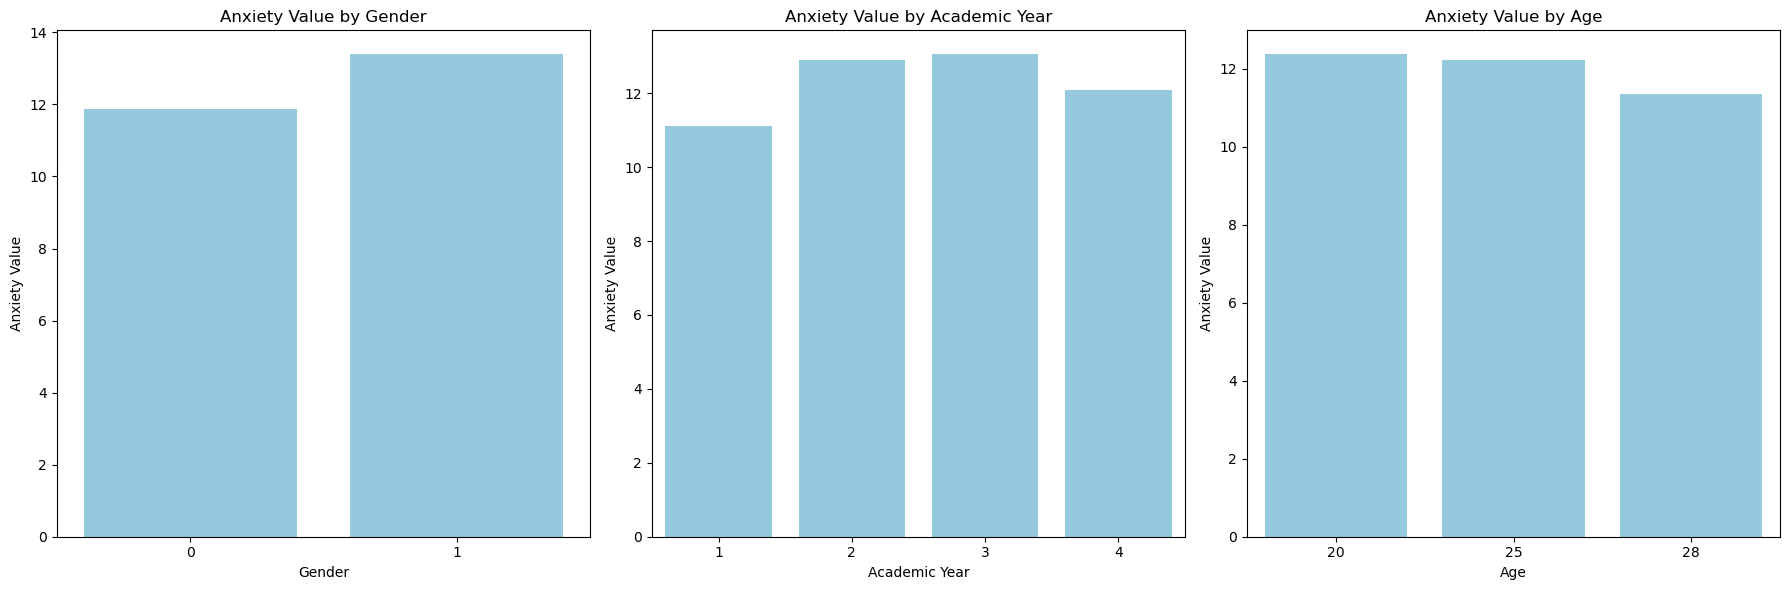

In [46]:
# Create subplots for the three bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Gender with Anxiety Value
sns.barplot(x='gender', y='anxiety_value', data=converted_cleaned_student_data, ax=axes[0], color = 'skyblue', errorbar = None)
axes[0].set_title('Anxiety Value by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Anxiety Value')

# Bar plot for Academic Year with Anxiety Value
sns.barplot(x='academic_year', y='anxiety_value', data=converted_cleaned_student_data, ax=axes[1], color = 'skyblue', errorbar = None)
axes[1].set_title('Anxiety Value by Academic Year')
axes[1].set_xlabel('Academic Year')
axes[1].set_ylabel('Anxiety Value')

# Bar plot for Age with Anxiety Value
sns.barplot(x='age', y='anxiety_value', data=converted_cleaned_student_data, ax=axes[2], color = 'skyblue', errorbar = None)
axes[2].set_title('Anxiety Value by Age')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Anxiety Value')

plt.tight_layout()
plt.show()

4. The plot shows that females (represented by 1) have a higher average anxiety value compared to males (represented by 0). Anxiety levels seem to be highest in the second and third academic years, with a slight dip in the fourth year and the highest is in third year. The highest anxiety levels are observed in students aged 20, with a slight decrease in the levels as age increases.

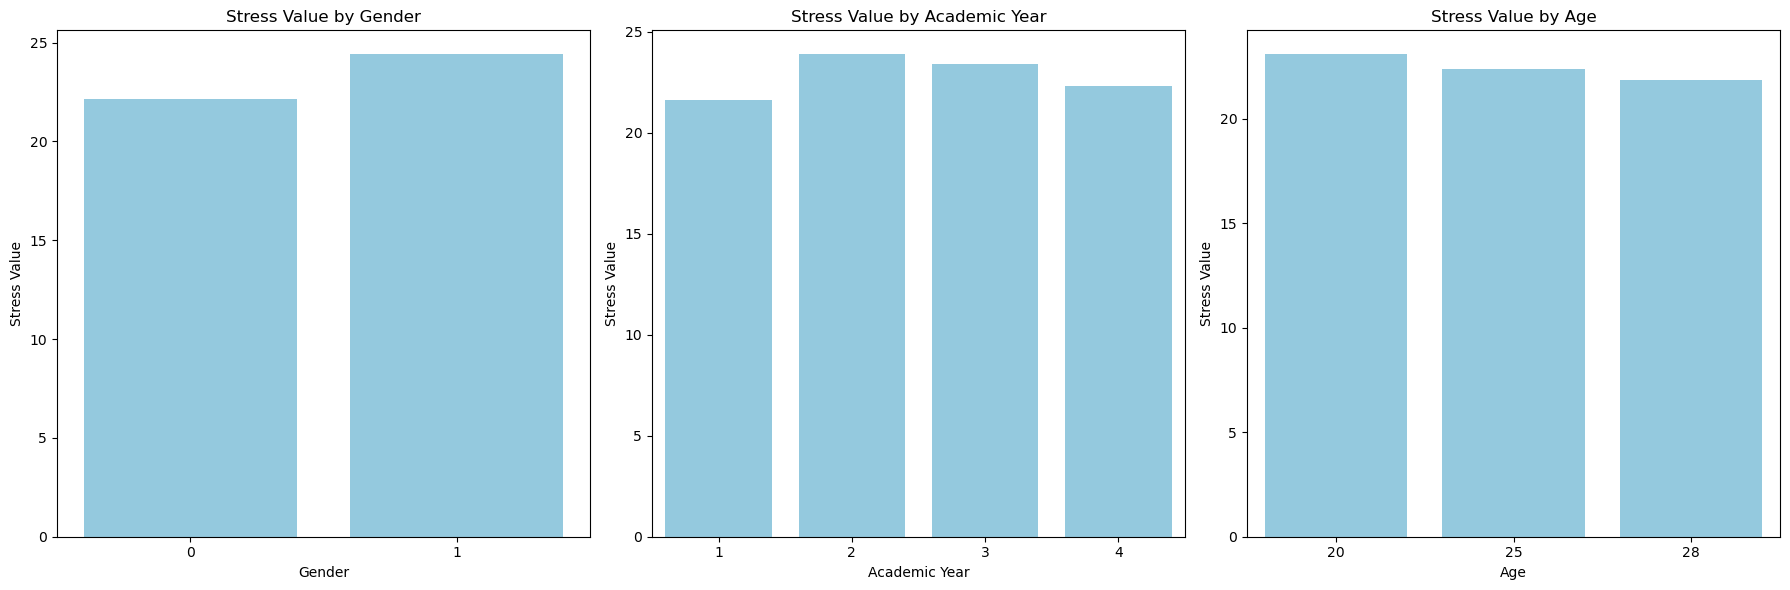

In [47]:
# Create subplots for the three bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Gender with Stress Value
sns.barplot(x='gender', y='stress_value', data=converted_cleaned_student_data, ax=axes[0], color = 'skyblue', errorbar = None)
axes[0].set_title('Stress Value by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Stress Value')

# Bar plot for Academic Year with Stress Value
sns.barplot(x='academic_year', y='stress_value', data=converted_cleaned_student_data, ax=axes[1], color = 'skyblue', errorbar = None)
axes[1].set_title('Stress Value by Academic Year')
axes[1].set_xlabel('Academic Year')
axes[1].set_ylabel('Stress Value')

# Bar plot for Age with Stress Value
sns.barplot(x='age', y='stress_value', data=converted_cleaned_student_data, ax=axes[2], color = 'skyblue', errorbar = None)
axes[2].set_title('Stress Value by Age')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Stress Value')

plt.tight_layout()
plt.show()

5. Similar to the anxiety plot, females have higher stress levels compared to males. Stress levels are relatively high in the second and third years and show a slight decline in the fourth year. The stress value keeps the previous plot's consistency with the younger students having the biggest stress value.

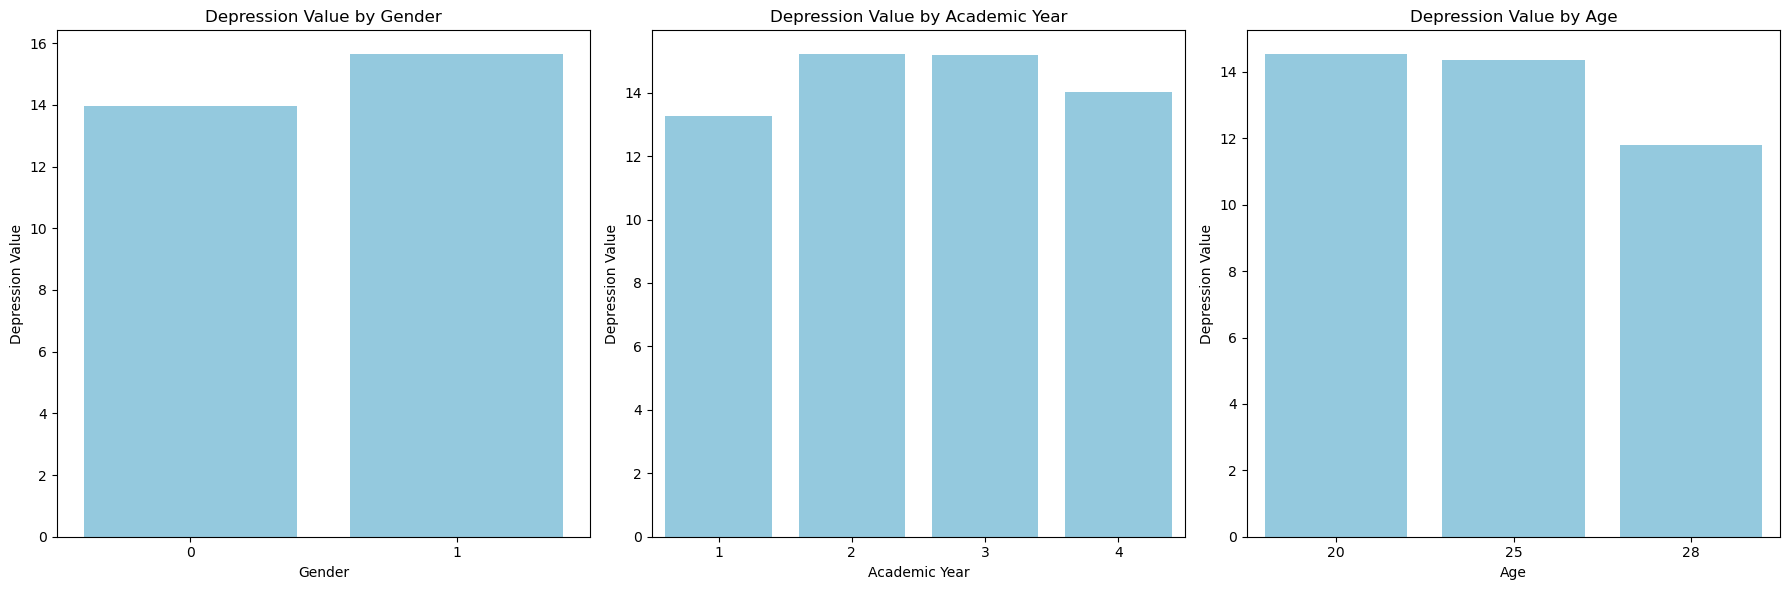

In [48]:
# Create subplots for the three bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Gender with Depression Value
sns.barplot(x='gender', y='depression_value', data=converted_cleaned_student_data, ax=axes[0], color = 'skyblue', errorbar = None)
axes[0].set_title('Depression Value by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Depression Value')

# Bar plot for Academic Year with Depression Value
sns.barplot(x='academic_year', y='depression_value', data=converted_cleaned_student_data, ax=axes[1], color = 'skyblue', errorbar = None)
axes[1].set_title('Depression Value by Academic Year')
axes[1].set_xlabel('Academic Year')
axes[1].set_ylabel('Depression Value')

# Bar plot for Age with Depression Value
sns.barplot(x='age', y='depression_value', data=converted_cleaned_student_data, ax=axes[2], color = 'skyblue', errorbar = None)
axes[2].set_title('Depression Value by Age')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Depression Value')

plt.tight_layout()
plt.show()

6. Again the females show higher depression values, again the second and third year have the highest values with the second being the highest. And the depression value is highest among younger students and decreases slightly with age.
7. In general across all three mental health indicators (anxiety, stress, and depression), females consistently report higher values than males, indicating that female students in this dataset experience more significant mental health challenges. But we have to keep in mind taht female entries are less than the male entries in our data, but the entries are substantial and the findings likely reflect real differences. But we always got to keep that in mind and we will try to add more insight with the exploration of the next dataset.Anxiety, stress, and depression levels tend to peak in the middle academic years (particularly the 2nd and 3rd years) and decrease slightly in the final year. This pattern suggests that the middle years of university may be particularly challenging for students.This is  Younger students, particularly those around 20 years old, report higher levels of anxiety, stress, and depression. These values decrease slightly as students get older. But the entires for the age of 28 raise concerns about potential bias and the reliability of conclusions drawn about age-related differences in mental health indicators as the entries are not enough and are insignificant compared with the other ones so we have got to be really cautious. We can still see a trend that the age of 25 are less depressed and stressed than 20 year olds. We will explore the other set too and see how the age influences the mental health levels and then make a conclusion.
8. Let's now see how the different departments influence the mental health factors. Most of them are engineering departments, but we cannot disrespect them and put them under one category as Mechanical Engineering, Electrical Engineering, Civil Engineering and Computer Engineering don't have anything in common and focus on different aspects and studies. Bare in mind Pharmacy and Social Science have only 1 entry so the mean value would be big, we will filter them out of the bar plots whidh we will use to find the average stress levels across departments. 

In [49]:
filtered_data = converted_cleaned_student_data[
    ~converted_cleaned_student_data['department'].isin(['Pharmacy', 'Social Science'])
]

In [50]:
stress_means = filtered_data.groupby('department')['stress_value'].mean().reset_index()
anxiety_means = filtered_data.groupby('department')['anxiety_value'].mean().reset_index()
depression_means = filtered_data.groupby('department')['depression_value'].mean().reset_index()
stress_means_sorted = stress_means.sort_values(by='stress_value', ascending=False)
anxiety_means_sorted = anxiety_means.sort_values(by='anxiety_value', ascending=False)
depression_means_sorted = depression_means.sort_values(by='depression_value', ascending=False)


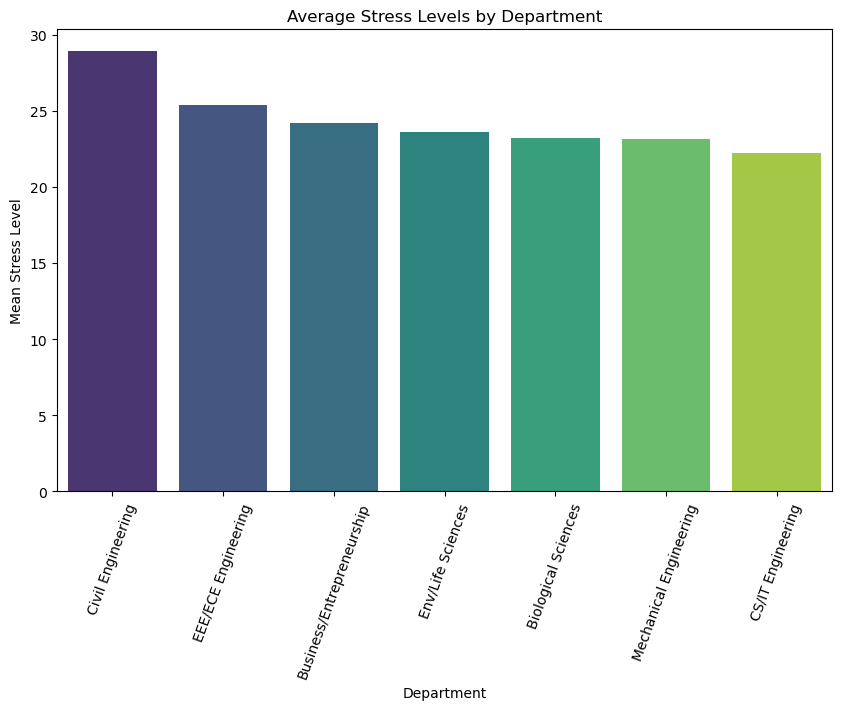

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='stress_value', data=stress_means_sorted, palette='viridis')
plt.title('Average Stress Levels by Department')
plt.xticks(rotation=70)
plt.ylabel('Mean Stress Level')
plt.xlabel('Department')
plt.show()

 9. After looking at the plots we can see Civil Engineering has the highest average stress levels. Followed by EEE/ECE Engineering. Interesting enough the next three departments are non-engineering. The lowest is Computer Science Engineering. This shows that Civil Engineering is the most stressful of all the departments and also shows that non-engineering sciences are more stressful than some engineering sciences like CS or Mechanical Engineering. This is contrary to my expdctations that all engineering sciences are more stressful than all other sciences. 

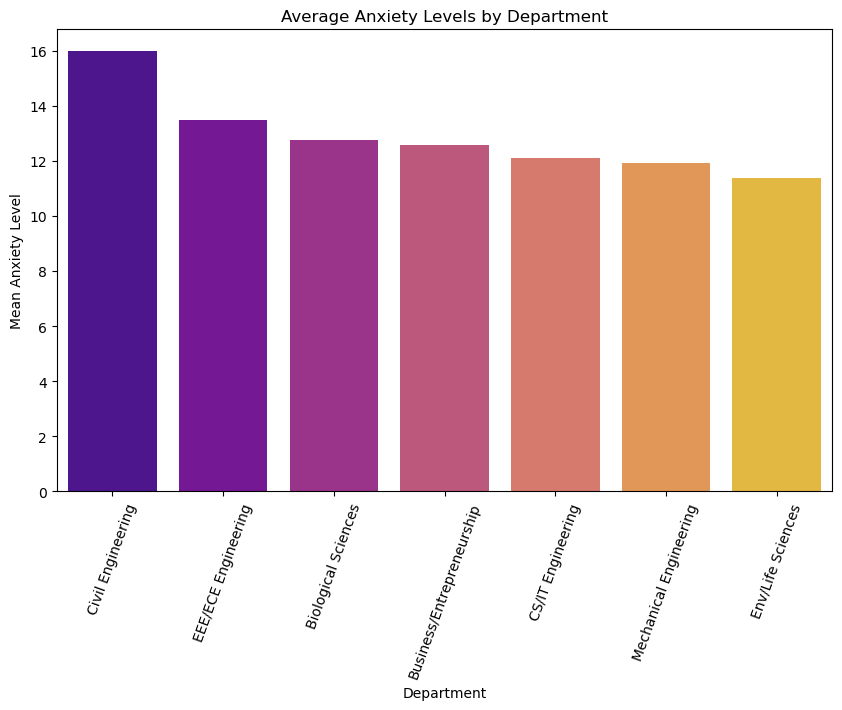

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='anxiety_value', data=anxiety_means_sorted, palette='plasma')
plt.title('Average Anxiety Levels by Department')
plt.xticks(rotation=70)
plt.ylabel('Mean Anxiety Level')
plt.xlabel('Department')
plt.show()


10. Again here we can see that Civil Engineering has the highest anxiety levels followed by EEE Engineering. It's followed by Biological Sciences and Business Entrepreneuship. This time CS Engineering has higher levels than Mechanical and Enviromental sciences. Again we have non-engineering sciences with higher levels than some engineering ones like CS and Mechanical. The least anxious this time is the Enviromental science

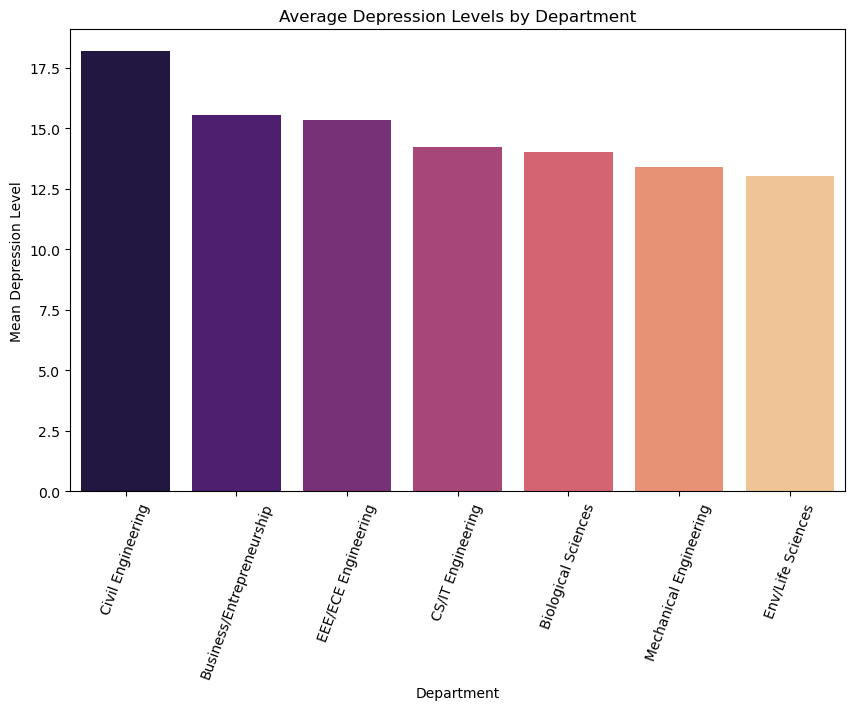

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='depression_value', data=depression_means_sorted, palette='magma')
plt.title('Average Depression Levels by Department')
plt.xticks(rotation=70)
plt.ylabel('Mean Depression Level')
plt.xlabel('Department')
plt.show()

11. And again Civil Engineering keeps the highest levels, this time for depression levels. Interesting enough it's followed by Business and then closely followed by EEE Engineering. Mechanical engineering comes second to last and again the least depressing is Enviromental sciences.
12. In conclusion Civil Engineering is the department with highest levels of stress, anxiety and depression. Contrary to my opinion non-engineering sciences have higher stress,anxiety and depression values than some engineering sciences like Mechanical or CS Engineering. Departments like Environmental/Life Sciences and CS/IT Engineering show comparatively lower levels of these challenges, though they are still significant. We will try to add more insight into that with the second dataset and the finding we have from it.
13. We have now seen how different demographic factors affect the mental health, now we should see how the mental health affects the CGPA of the students and see wheter a worse mental state (stress, anxiety or depression) has any negative effect on the CGPA.
14. We will try to run an OLS Regression model to understand which factors influence the student's cgpa. We will see how the depression_value, anxiety_value and stress_value influence the CGPA.

15. First let's explain what is OLS regression - OLS (Ordinary Least Squares) regression is a statistical method used to estimate the relationships between a dependent variable (also known as the response or outcome variable) and one or more independent variables (also known as predictors or explanatory variables). The primary goal of OLS regression is to find the line (or plane in the case of multiple variables) that best fits the data by minimizing the sum of the squared differences (residuals) between the observed values and the values predicted by the model. Key concepts are :
- Dependent Variable (Y): This is the outcome you are trying to predict or explain (e.g., CGPA).
- Independent Variables (X1, X2, ..., Xn): These are the factors that you believe have an impact on the dependent variable (e.g., age, gender, stress levels).
- Regression Coefficients (β): These represent the estimated change in the dependent variable for a one-unit change in an independent variable, holding all other variables constant.
- Residuals: The differences between the observed values and the predicted values from the model. OLS minimizes the sum of the squared residuals.

In [54]:
import statsmodels.api as sm

# Assuming 'converted_cleaned_student_data' is your DataFrame

# Define the dependent variable (current_cgpa)
y = converted_cleaned_student_data['current_cgpa']

# Define the independent variables
X = converted_cleaned_student_data[['stress_value', 'anxiety_value', 'depression_value' ]]
                                    
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           current_cgpa   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.527
Date:                Thu, 22 Aug 2024   Prob (F-statistic):             0.0559
Time:                        12:40:04   Log-Likelihood:                -1091.1
No. Observations:                1663   AIC:                             2190.
Df Residuals:                    1659   BIC:                             2212.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.3706      0.041  

16. Let's first explain what all those metrcis mean so that we know for further OLS analysis.
- Dep. Variable: current_cgpa : This is the dependent variable that the model is trying to predict. In this case, it’s the current CGPA of the students.
- Model: OLS (Ordinary Least Squares) : This indicates that the regression analysis was done using the OLS method, which aims to minimize the sum of the squared differences between the observed and predicted values.
- Method: Least Squares : The method used for estimating the coefficients in the regression model.
- Date and Time is self-explanatory : When was the model run.
- No. Observations: 1663 : The number of observations (students) included in the analysis.
- Df Residuals: 1659 : Degrees of freedom for the residuals, calculated as the number of observations minus the number of estimated parameters (including the intercept). In this case, 1663 - 4 = 1659 (since there are 3 predictors plus the intercept).
- Df Model: 3 : Degrees of freedom for the model, which corresponds to the number of independent variables (predictors) in the model. Here, it’s 3 (stress_value, anxiety_value, depression_value).
- Covariance Type: Nonrobust : Indicates that the standard errors are calculated under the assumption of homoscedasticity (constant variance of errors). Nonrobust covariance might not adjust for heteroscedasticity (varying variance).
- R-squared: 0.005 : R-squared is the proportion of the variance in the dependent variable that is predictable from the independent variables. In this case, an R-squared of 0.005 means that only 0.5% of the variance in CGPA is explained by the stress, anxiety, and depression values. This is a very low R-squared, indicating that the model does not explain much of the variation in CGPA.
- Adj. R-squared: 0.003 : The adjusted R-squared adjusts the R-squared value for the number of predictors in the model. It’s slightly lower than the R-squared (0.003), which is common when adding variables that don’t contribute much to the model. This adjusted value suggests that after accounting for the number of predictors, the model still explains very little of the variance in CGPA.
- F-statistic: 2.527 : The F-statistic tests whether at least one of the regression coefficients is significantly different from zero. In this case, the F-statistic of 2.527 suggests a low overall significance of the model.
- Prob (F-statistic): 0.0559 :  This is the p-value associated with the F-statistic. A p-value of 0.0559 is slightly above the common significance threshold of 0.05, indicating that the model is not statistically significant at the 5% level. It suggests that the independent variables may not collectively have a strong impact on predicting CGPA.
- Log-Likelihood: -1091.1 : Log-likelihood is a measure of the goodness-of-fit of the model. Higher values indicate a better fit. However, on its own, it’s difficult to interpret without comparing to other models.
- AIC: 2190 : AIC (Akaike Information Criterion) is a measure used to compare models, where lower values indicate a better fit while penalizing for the number of parameters. It’s useful when comparing different models to choose the one that balances fit and complexity.
- BIC: 2212 : Explanation: BIC (Bayesian Information Criterion) is similar to AIC but with a stricter penalty for the number of parameters in the model. Like AIC, lower values are preferred when comparing models.
- const (Intercept): 3.3706 : The intercept represents the expected value of current_cgpa when all independent variables are zero. Here, it suggests that if stress, anxiety, and depression were all zero, the expected CGPA would be 3.3706.
- stress_value: -0.0057 (p = 0.012) :  For each one-unit increase in stress, CGPA decreases by 0.0057 points, holding other variables constant. The p-value (0.012) indicates that this result is statistically significant, meaning stress has a small but significant negative impact on CGPA.
- anxiety_value: 0.0032 (p = 0.361) : For each one-unit increase in anxiety, CGPA increases by 0.0032 points, holding other variables constant. However, the p-value (0.361) indicates that this effect is not statistically significant, meaning we cannot confidently say that anxiety impacts CGPA in this model.
- depression_value: -0.0007 (p = 0.799) : For each one-unit increase in depression, CGPA decreases by 0.0007 points, holding other variables constant. The p-value (0.799) shows that this effect is not statistically significant.
- Omnibus: 133.027 (Prob(Omnibus): 0.000) : The Omnibus test checks the skewness and kurtosis of the residuals to see if they deviate from normality. A significant result (p = 0.000) suggests that the residuals are not normally distributed, which could be a concern for the validity of the OLS model assumptions.
- Durbin-Watson: 1.718 : This statistic tests for autocorrelation in the residuals. Values close to 2 suggest no autocorrelation. Here, 1.718 is close to 2, indicating that autocorrelation is not a major issue in this model.
- Jarque-Bera (JB): 164.133 (Prob(JB): 2.29e-36) : The Jarque-Bera test also assesses normality of the residuals. A significant result (p-value very close to 0) confirms that the residuals are not normally distributed.
- Skew: -0.752 : Skewness measures the asymmetry of the residuals. A negative skew indicates that the left tail is longer or fatter than the right tail. Here, the skewness is -0.752, indicating some asymmetry in the residuals.
- Kurtosis: 3.324 :  Kurtosis measures the "tailedness" of the residual distribution. A kurtosis value close to 3 indicates a distribution similar to the normal distribution, but here it’s slightly higher, suggesting heavier tails.
- Cond. No.: 112 : The condition number tests for multicollinearity, or linear dependence among predictors. A high condition number (e.g., above 30) could indicate multicollinearity. Here, 112 suggests some multicollinearity might be present but not severe.

17. In conclusion:
- The model explains very little of the variance in CGPA (R-squared = 0.005), and the overall model fit is weak.
- Of the predictors, only stress has a statistically significant impact on CGPA, and it’s a negative effect, but small.
- The tests for normality and autocorrelation indicate some issues with the residuals, suggesting that the model might not fully meet the assumptions of OLS regression.
- Given the low R-squared and the lack of significance in most predictors, it might be worth exploring additional variables

18. Now we will run OLS regression with all factors that summarize the final depression value and so for stress and anxiety. Here I should note that I will not be using the stress_value, anxiety_value and depression_value,  because they are the sum of the other factors (as noted previously,)
- 'nervous', 'worrying','trouble_relaxing', 'easily_annoyed', 'excessive_worry', 'restless', 'fearful' make the sum of anxiety value.
- 'upset', 'lack_of_control', 'nervous_or_stressed', 'inadequate_coping', 'confident', 'things_going_well', 'control_irritations', 'top_performance', 'angered_by_performance', 'overwhelmed' make the sum of stress_value
- 'lack_of_interest', 'feeling_down', 'sleep_issues', 'fatigue', 'appetite_issues', 'self_doubt', 'concentration_issues', 'movement_issues', 'suicidal_thoughts' make the sum for depression_value

19. We will be using all of these factors because if we use the depression_value, anxiety_value and stress_value we risk having redundancy in our model. Redundancy in a model occurs when some variables are included that do not add new information because they are simply combinations of other variables already in the model.

In [55]:
# Define the dependent variable (current_cgpa)
y = converted_cleaned_student_data['current_cgpa']

# Define the independent variables
X = converted_cleaned_student_data[[
        'nervous', 'worrying',
       'trouble_relaxing', 'easily_annoyed', 'excessive_worry', 'restless',
       'fearful', 'upset', 'lack_of_control',
       'nervous_or_stressed', 'inadequate_coping', 'confident',
       'things_going_well', 'control_irritations', 'top_performance',
       'angered_by_performance', 'overwhelmed',
       'lack_of_interest', 'feeling_down', 'sleep_issues', 'fatigue',
       'appetite_issues', 'self_doubt', 'concentration_issues',
       'movement_issues', 'suicidal_thoughts', ]]
                                    
                                    
                                    
                                    
                                  

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           current_cgpa   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     4.721
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           6.77e-14
Time:                        12:40:04   Log-Likelihood:                -1034.7
No. Observations:                1663   AIC:                             2123.
Df Residuals:                    1636   BIC:                             2270.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

20. As we can now see the R-squared is now 7% but this is still not enough and barely explains small part of the data.
-  The R-squared value of 0.070 indicates that the model explains only 7% of the variance in CGPA. While the model is statistically significant as a whole, the low R-squared suggests that many factors influencing CGPA are not captured by the current set of predictors.
- Variables like nervous, top_performance, angered_by_performance, fatigue, self_doubt, and inadequate_coping have statistically significant relationships with CGPA, although some of these findings (e.g., positive impact of inadequate coping and fatigue) may be counterintuitive and suggest the need for deeper investigation.
- As we can see nervousness, self doubt and angered by performance have negative effect on the CGPA, which sounds intuitive that when you doubt yourself you don't achieve your full potential, nervousness leads to lower test results overall and angered by performance could be because the cgpa is already low and that's why it has a negative effect or the anger makes it harder to study.

21. Let's now address the first issue by adding all factros to the OLS both mental and demographhic and see what that does.
22. For the counterintuitive findings it's interesting to see that top_performance has a negative effect on the cgpa, this could be led down to overconfidence or having too high of expectations, but these are just my assumptions. About inadequate_coping my assumption is that students who feel they are not coping well with stress or challenges might overcompensate by working harder, studying more, or seeking additional help. This extra effort could lead to better academic outcomes, even if the students feel they aren't managing well psychologically. And finally for fatigue my assumption is that fatigue could be a sign of students pushing themselves hard— studying late, engaging in intense academic activities, or taking on heavy course loads. While this leads to tiredness, it also suggests that they are highly engaged with their studies, which could result in higher academic performance.

In [56]:
# Define the dependent variable (current_cgpa)
y = converted_cleaned_student_data['current_cgpa']

# Define the independent variables
X = converted_cleaned_student_data[[
        'age', 'gender', 'academic_year', 'scholarship', 'nervous', 'worrying',
       'trouble_relaxing', 'easily_annoyed', 'excessive_worry', 'restless',
       'fearful', 'upset', 'lack_of_control',
       'nervous_or_stressed', 'inadequate_coping', 'confident',
       'things_going_well', 'control_irritations', 'top_performance',
       'angered_by_performance', 'overwhelmed',
       'lack_of_interest', 'feeling_down', 'sleep_issues', 'fatigue',
       'appetite_issues', 'self_doubt', 'concentration_issues',
       'movement_issues', 'suicidal_thoughts', ]]
                                    
                                    
                                    
                                    
                                  

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           current_cgpa   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     5.933
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           1.46e-21
Time:                        12:40:04   Log-Likelihood:                -1008.8
No. Observations:                1663   AIC:                             2080.
Df Residuals:                    1632   BIC:                             2248.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

23. As we can now see the R-squared value of 0.098 indicates that the model explains about 9.8% of the variance in CGPA. While statistically significant, the model explains only a small portion of what influences CGPA, so the new factors had some influence but its still not that much and we have ran out of factors that could influnce the cgpa.
- Age, scholarship, nervousness, trouble relaxing, inadequate coping, top performance, angered by performance, fatigue, and self-doubt were found to be statistically significant predictors of CGPA
- Compared with the last model the current model shows a modest improvement in R-squared and adjusted R-squared, indicating that the additional predictors or refinements have increased the model's explanatory power.
- Many predictors that were significant in the previous model remain significant in the current model, with similar effect sizes. This suggests robustness in the findings across models.
-  Age is a new addition in the current model and shows a statistically significant negative impact on CGPA, suggesting that older students tend to have slightly lower GPAs.
- Scholarships positively impact CGPA and this could mean that either students who have scholarships are more motivated or they receive scholarship because of high cgpa.

24. From all that we have seen from these OLS Regressions we can conclude that we've already included all relevant factors from the dataset in the regression model and the R-squared remains relatively low, it could suggest that CGPA is not strongly influenced by the factors we've measured, such as mental health variables, or that these factors account for only a small part of the variance in CGPA.
- It’s possible that while mental health and related factors do have some impact on CGPA, their overall influence might be modest. Students' academic performance could be more strongly influenced by other factors not captured in our dataset.
-  The way certain factors are measured might affect their relationship with CGPA. For example, self-reported mental health symptoms might not perfectly capture the actual mental health status or its impact on academic performance.
- There could be other important factors influencing CGPA that aren't included in our dataset
- Even though the effects of mental health variables on CGPA might be modest, they can still be meaningful, particularly if they are statistically significant. For instance, identifying that anxiety or fatigue has a small but real impact on academic performance could be important for targeted interventions, even if these factors only explain a small portion of the overall variance.
- Our findings suggest that while certain factors like mental health have some influence on CGPA, their overall impact may be modest. This could be due to a combination of the inherent complexity and randomness of academic performance, the limited influence of the measured factors, or the possibility that other unmeasured factors play a more significant role.

25. Let's finalize these findings with some plots first to see if there is any relationship or to spot any trends between mental health and cgpa and let's see the influence of age and scholarship on CGPA
- Let's see if there are any trends between CGPA and mental health factors.

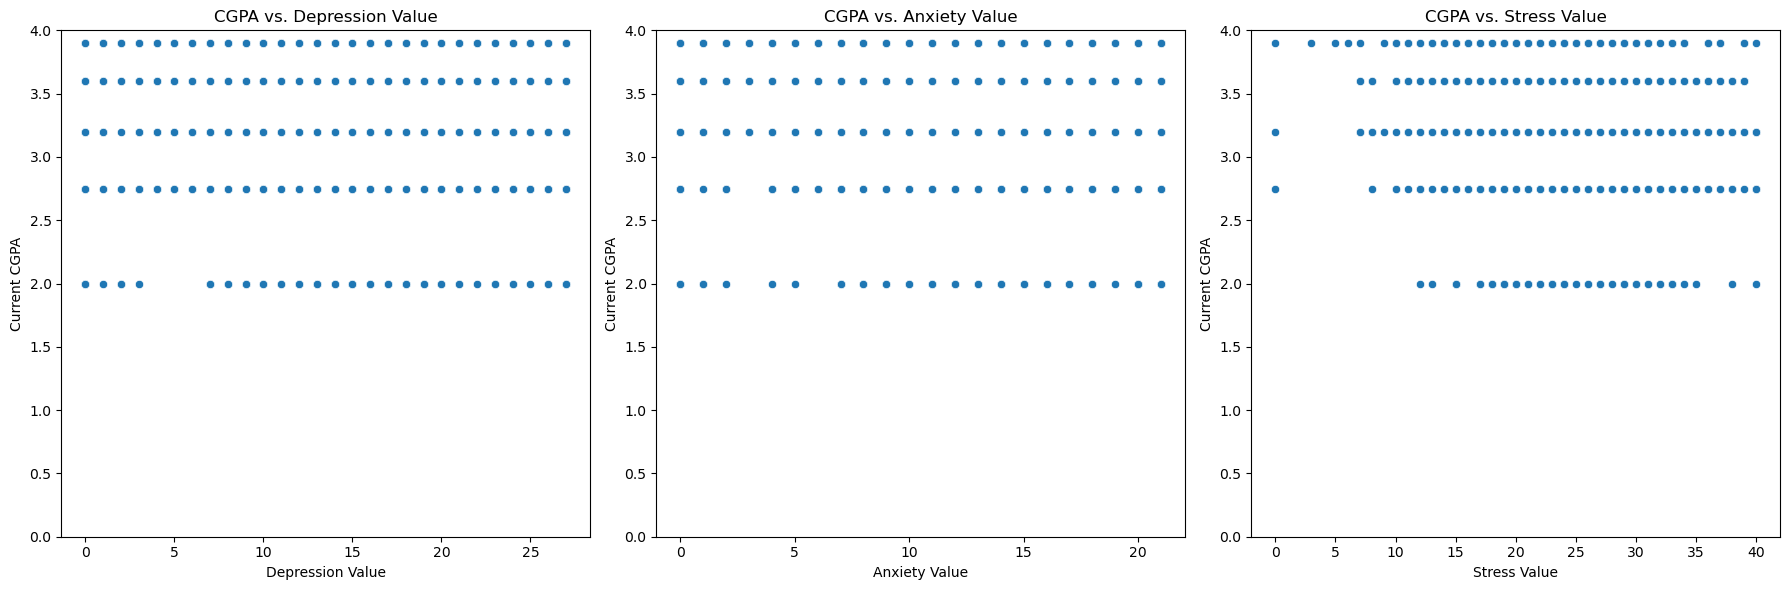

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for CGPA vs. Depression Value
sns.scatterplot(x='depression_value', y='current_cgpa', data=converted_cleaned_student_data, ax=axes[0])
axes[0].set_title('CGPA vs. Depression Value')
axes[0].set_xlabel('Depression Value')
axes[0].set_ylabel('Current CGPA')
axes[0].set_ylim(0, 4)

# Scatter plot for CGPA vs. Anxiety Value
sns.scatterplot(x='anxiety_value', y='current_cgpa', data=converted_cleaned_student_data, ax=axes[1])
axes[1].set_title('CGPA vs. Anxiety Value')
axes[1].set_xlabel('Anxiety Value')
axes[1].set_ylabel('Current CGPA')
axes[1].set_ylim(0, 4)

# Scatter plot for CGPA vs. Stress Value
sns.scatterplot(x='stress_value', y='current_cgpa', data=converted_cleaned_student_data, ax=axes[2])
axes[2].set_title('CGPA vs. Stress Value')
axes[2].set_xlabel('Stress Value')
axes[2].set_ylabel('Current CGPA')
axes[2].set_ylim(0, 4)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the scatter plots
plt.show()

Here we can see that across all three scatterplots, there doesn’t appear to be a strong, linear relationship between CGPA and the psychological factors (depression, anxiety, and stress).
The points are fairly evenly distributed across the range of each psychological value, indicating that higher or lower values of depression, anxiety, and stress do not show a clear and consistent trend in affecting CGPA.
This further supports our findings that there isn't a direct connection between mental health and CGPA

- Now let's see CGPA by Age and Scholarship 

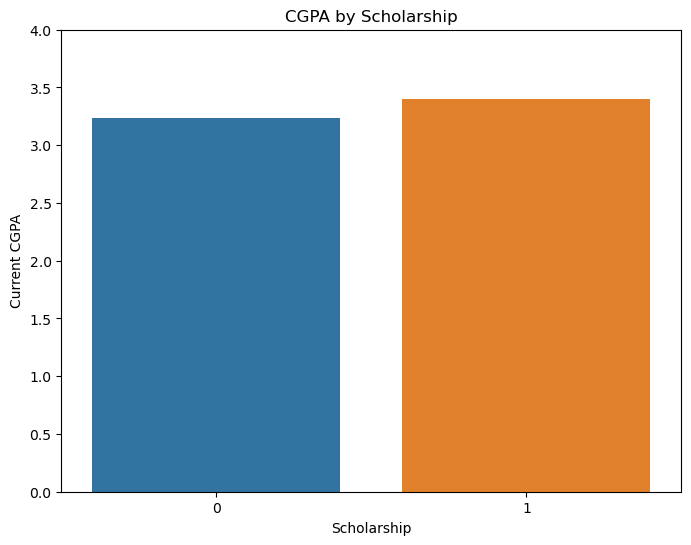

In [58]:
plt.figure(figsize=(8, 6))
sns.barplot(x='scholarship', y='current_cgpa', data=converted_cleaned_student_data, errorbar = None)
plt.title('CGPA by Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Current CGPA')
plt.ylim(0, 4)  # Assuming CGPA is on a 0-4 scale
plt.show()

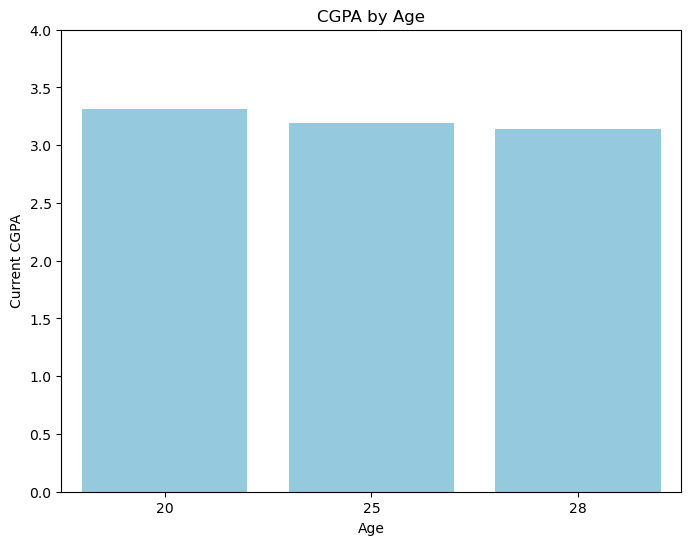

In [59]:
plt.figure(figsize=(8, 6))
sns.barplot(x='age', y='current_cgpa', data=converted_cleaned_student_data, color = 'skyblue', errorbar = None)
plt.title('CGPA by Age')
plt.xlabel('Age')
plt.ylabel('Current CGPA')
plt.ylim(0, 4)  # Assuming CGPA is on a 0-4 scale
plt.show()

- As we can see students with scholarship have higher CGPA and students who are older tend to have lower CGPA results just as our OLS model concluded.

## Exploring the second dataset Student Mental health.csv students from Malaysia

The questions stay the same as the first dataset: 
- Which factors(age,academic year, gender, course) affect the mental health, does the mental health affect the CGPA.
- Which factors outside the mental health affect the CGPA.
- Whether the department has any effect on mental health based on my presumptions that engineering students suffer more from mental health problems
1. Let's first see how is the CGPA distributed and whether the data will be helpful with finding out how mental health affects the CGPA. As when i manually checked the data it looked like most CGPA's are high.

In [60]:
data_cleaned_nan_snake.cgpa.value_counts()

cgpa
3.75    48
3.25    43
2.75     4
1.0      3
2.25     2
Name: count, dtype: int64

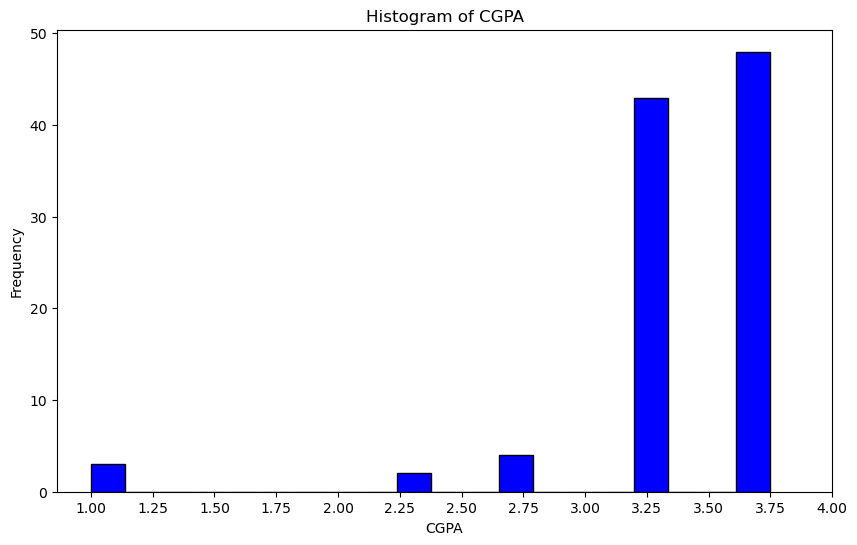

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned_nan_snake['cgpa'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.xticks(np.arange(1.0, 4.25, 0.25))
plt.show()

2. As we can see there are a lot of high CGPA's with not much variety most are 3.25 and 3.75 and we have very few lower CGPA's (three 1.0, four 2.75 and two 2.25). This could mean that again we wouldn't be able to find an exact connection between mental health and CGPA.
3. Let's first begin with the demographic influence on mental health.

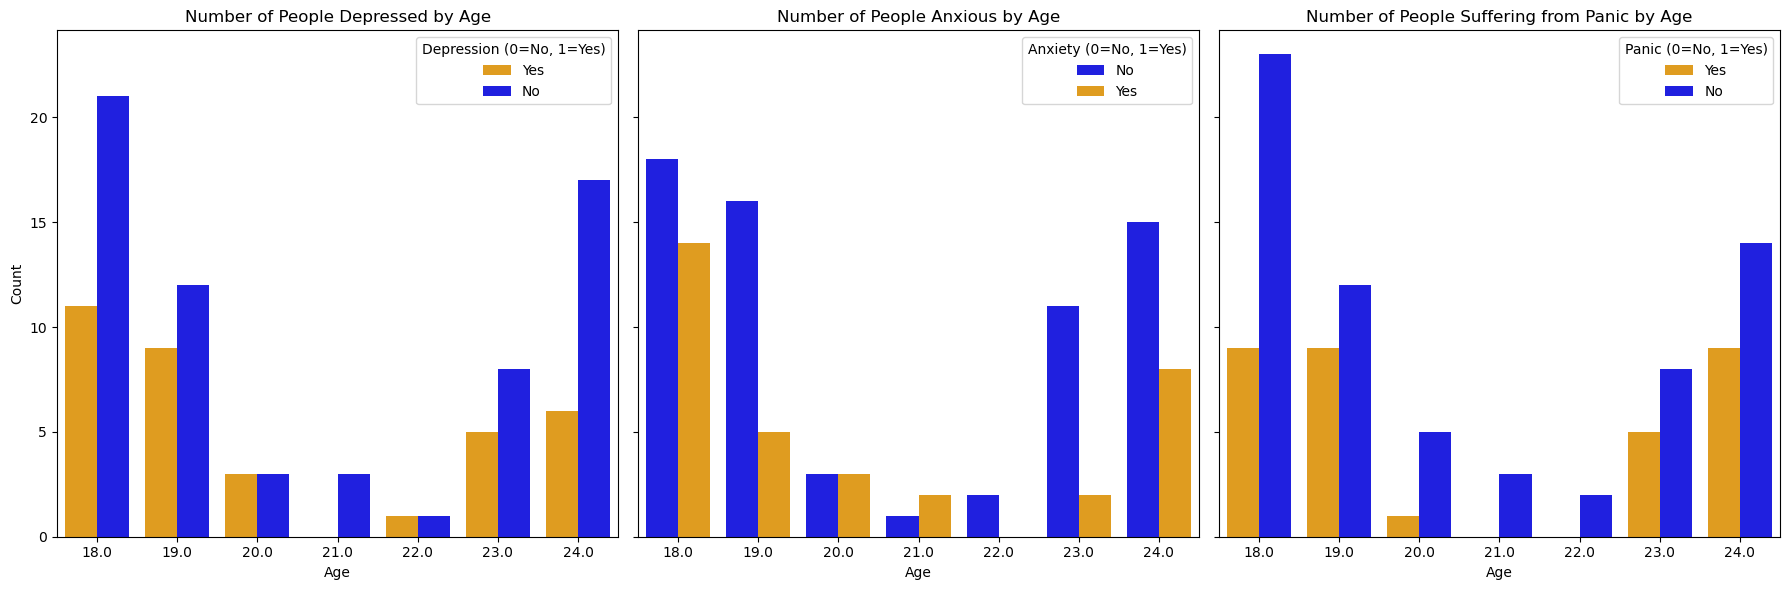

In [74]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define the color palette
palette = {'No': 'blue', 'Yes': 'orange'}

# First plot: Number of People Depressed by Age
sns.countplot(x='age', hue='depression', data=data_cleaned_nan_snake, ax=axs[0], palette=palette)
axs[0].set_title('Number of People Depressed by Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')
axs[0].legend(title='Depression (0=No, 1=Yes)')

# Second plot: Number of People Anxious by Age
sns.countplot(x='age', hue='anxiety', data=data_cleaned_nan_snake, ax=axs[1], palette=palette)
axs[1].set_title('Number of People Anxious by Age')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('')
axs[1].legend(title='Anxiety (0=No, 1=Yes)')

# Third plot: Number of People Suffering from Panic by Age
sns.countplot(x='age', hue='panic', data=data_cleaned_nan_snake, ax=axs[2], palette=palette)
axs[2].set_title('Number of People Suffering from Panic by Age')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('')
axs[2].legend(title='Panic (0=No, 1=Yes)')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

In [80]:
data_cleaned_nan_snake.age.value_counts()

age
18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
Name: count, dtype: int64

4. Based on what we see it looks like the age of 18 is the year with most depressed students, but this could also be biased by the fact that the number of entries for 18 years old are the most of all the entries. But it could be seen that:
- 18 and 19-year-olds seem to be the most affected age groups across depression, anxiety, and panic, with a high overall student count and a significant proportion experiencing mental health challenges.
- 24-year-olds also show a high count of students, but a lower proportion of them are reporting mental health issues compared to the younger age groups.
- These findings could suggest that younger students, particularly those aged 18 and 19, are more vulnerable to mental health challenges, potentially due to the pressures of transitioning into higher education or other life changes.

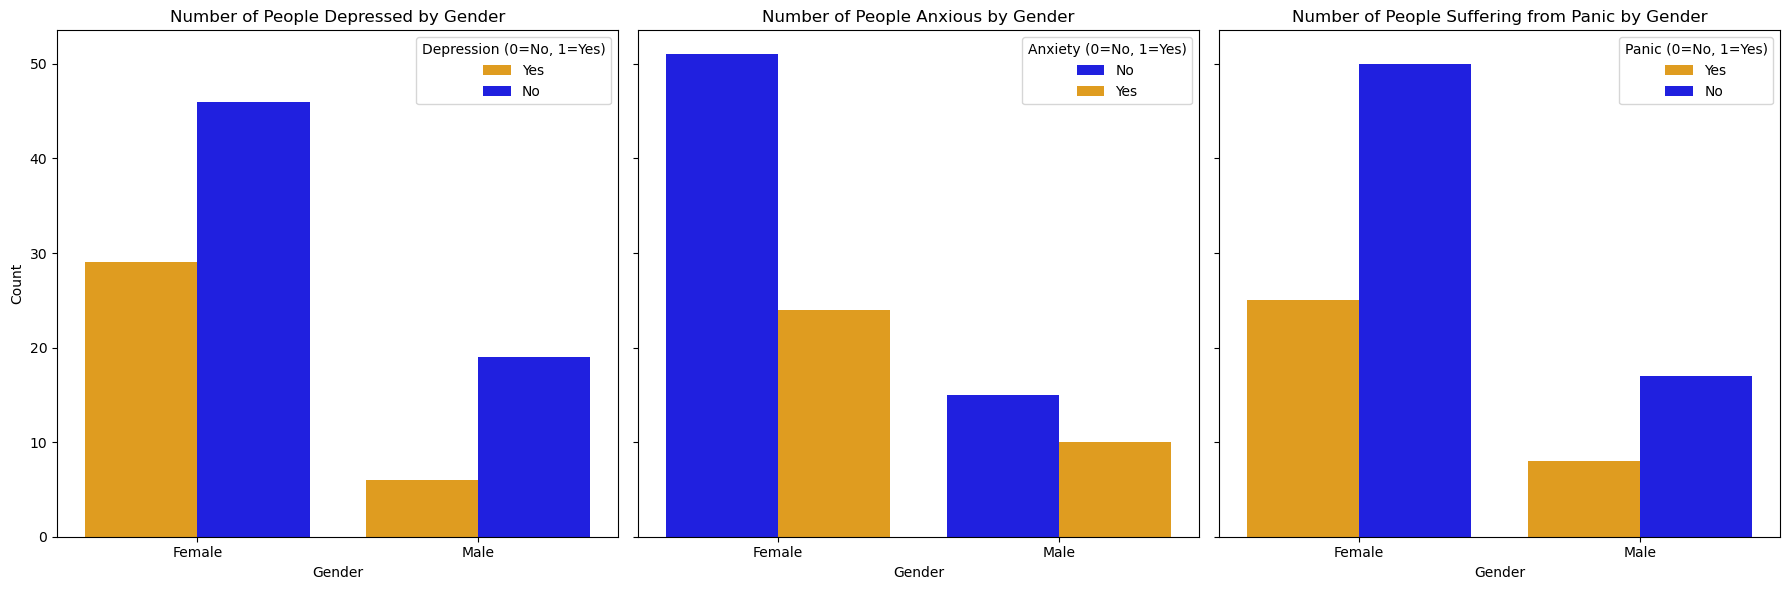

In [76]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define the color palette
palette = {'No': 'blue', 'Yes': 'orange'}

# First plot: Number of People Depressed by Age
sns.countplot(x='gender', hue='depression', data=data_cleaned_nan_snake, ax=axs[0], palette=palette)
axs[0].set_title('Number of People Depressed by Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')
axs[0].legend(title='Depression (0=No, 1=Yes)')

# Second plot: Number of People Anxious by Age
sns.countplot(x='gender', hue='anxiety', data=data_cleaned_nan_snake, ax=axs[1], palette=palette)
axs[1].set_title('Number of People Anxious by Gender')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('')
axs[1].legend(title='Anxiety (0=No, 1=Yes)')

# Third plot: Number of People Suffering from Panic by Age
sns.countplot(x='gender', hue='panic', data=data_cleaned_nan_snake, ax=axs[2], palette=palette)
axs[2].set_title('Number of People Suffering from Panic by Gender')
axs[2].set_xlabel('Gender')
axs[2].set_ylabel('')
axs[2].legend(title='Panic (0=No, 1=Yes)')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

In [77]:
data_cleaned_nan_snake.gender.value_counts()

gender
Female    75
Male      25
Name: count, dtype: int64

5. What we see here is that:
- The dataset is skewed towards females, with three times as many female respondents as male respondents. This difference in sample size can influence the results, making it appear that mental health issues are more prevalent among females simply because there are more females in the dataset.
- Both genders report experiencing depression, but the proportion is higher among females. However, given the larger number of females in the dataset, this might partially reflect the sample distribution rather than a true gender difference.
- Anxiety and panic are reported more frequently by females than males. This could indicate a higher prevalence of these conditions among females in the sample, or it could again be a reflection of the sample size difference.

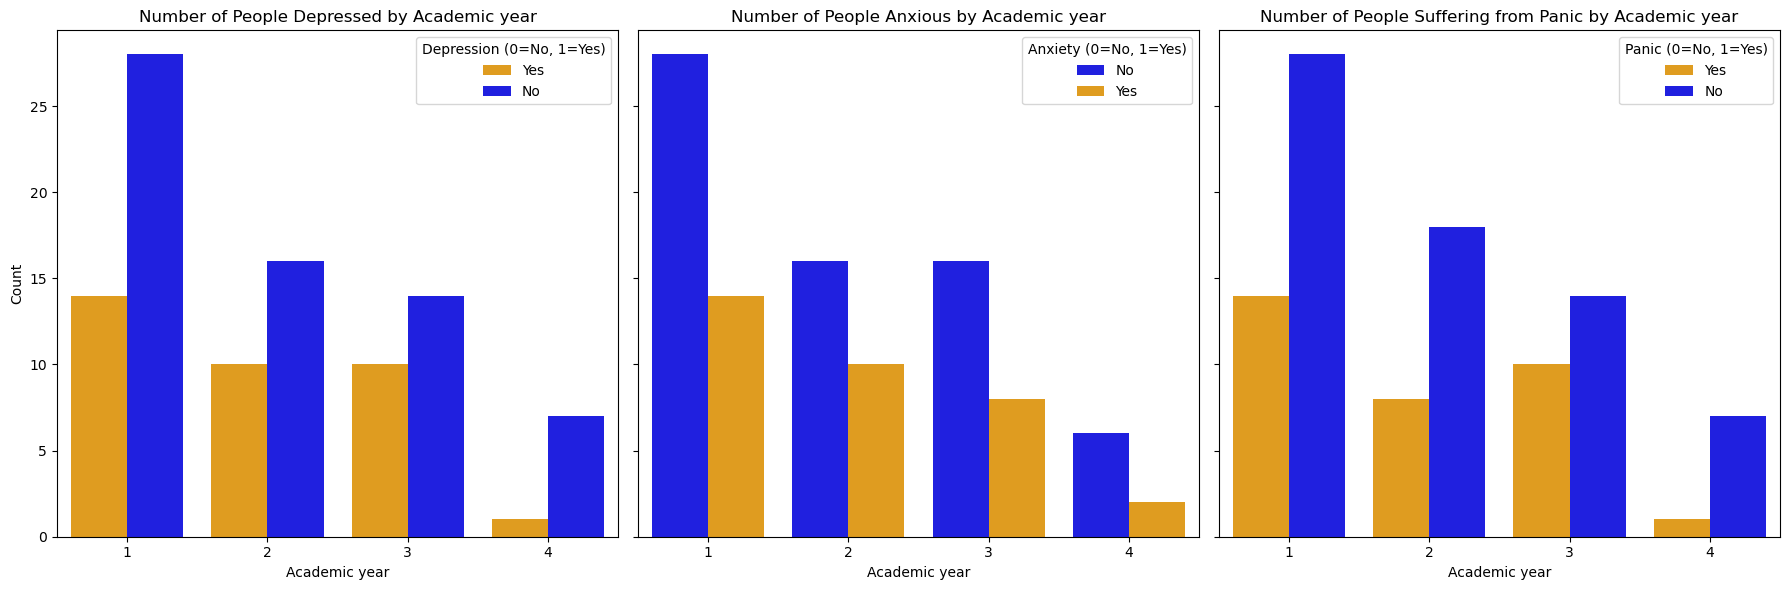

In [78]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define the color palette
palette = {'No': 'blue', 'Yes': 'orange'}

# First plot: Number of People Depressed by Age
sns.countplot(x='year', hue='depression', data=data_cleaned_nan_snake, ax=axs[0], palette=palette)
axs[0].set_title('Number of People Depressed by Academic year')
axs[0].set_xlabel('Academic year')
axs[0].set_ylabel('Count')
axs[0].legend(title='Depression (0=No, 1=Yes)')

# Second plot: Number of People Anxious by Age
sns.countplot(x='year', hue='anxiety', data=data_cleaned_nan_snake, ax=axs[1], palette=palette)
axs[1].set_title('Number of People Anxious by Academic year')
axs[1].set_xlabel('Academic year')
axs[1].set_ylabel('')
axs[1].legend(title='Anxiety (0=No, 1=Yes)')

# Third plot: Number of People Suffering from Panic by Age
sns.countplot(x='year', hue='panic', data=data_cleaned_nan_snake, ax=axs[2], palette=palette)
axs[2].set_title('Number of People Suffering from Panic by Academic year')
axs[2].set_xlabel('Academic year')
axs[2].set_ylabel('')
axs[2].legend(title='Panic (0=No, 1=Yes)')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

In [79]:
data_cleaned_nan_snake.year.value_counts()

year
1    42
2    26
3    24
4     8
Name: count, dtype: int64

6. What we see here is again a distribution skewed to the first year, 4th year has only 8 entries, but still we can compare the first three years to get some insight.
- 1st-Year Students: This group has the highest number of students and also the highest number reporting depression, anxiety, and panic. This suggests that the transition into university life may be particularly challenging, contributing to higher levels of reported mental health issues.
- 2nd and 3rd-Year Students: These groups show a relatively steady level of mental health issues, with a slight decline compared to the 1st year. The reported levels of depression, anxiety, and panic are still significant but not as high as in the 1st year.
- The 4th year has the fewest students and the lowest levels of reported mental health issues. This could indicate that students who make it to the final year might have better coping mechanisms, or it could reflect a smaller, possibly less representative sample size.
- This analysis indicates that mental health challenges are more commonly reported among 1st-year students, potentially due to the stress associated with transitioning to university life. The findings for 2nd and 3rd-year students suggest ongoing but slightly reduced challenges
- But we shall always consider the fact that the entries aren't equal and more entries would help benefit the analysis.

7. It seems from the plots that younger students in first years of education suffer more mentally than the older ones, but we have to keep in mind that the entries are not evenly distributed and this could affect the outcome. We cannot say about gender as the distribution is really skewed towards females and that is potential bias.

7. Let's now see whether the mental health affects the CGPA, but we have to bear in mind that the CGPA distribution is also heavily skewed to the higher values so different mental states could not have a clear effect or one that we could see.

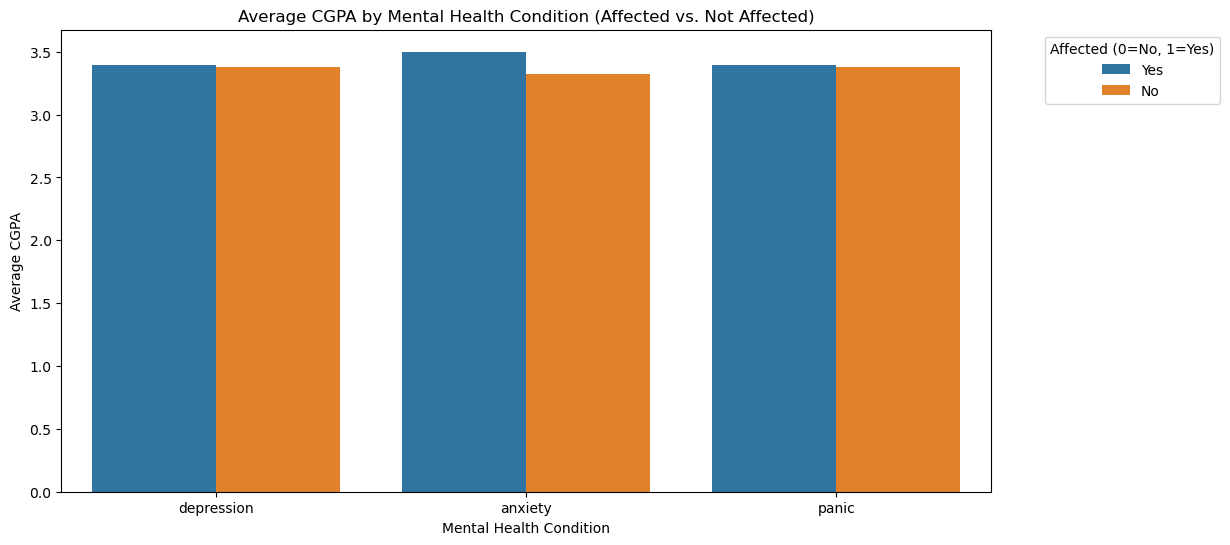

In [85]:
melted_df = pd.melt(data_cleaned_nan_snake, id_vars=['cgpa'], value_vars=['depression', 'anxiety', 'panic'],
                    var_name='Mental Health Condition', value_name='Affected')

# Plot the average CGPA for each mental health condition, separated by affected and not affected
plt.figure(figsize=(12, 6))
sns.barplot(x='Mental Health Condition', y='cgpa', hue='Affected', data=melted_df, errorbar = None)
plt.title('Average CGPA by Mental Health Condition (Affected vs. Not Affected)')
plt.xlabel('Mental Health Condition')
plt.ylabel('Average CGPA')

# Move the legend outside the plot
plt.legend(title='Affected (0=No, 1=Yes)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

8. Let's see how is the distribution of the Yes and No answers, as we already know that the CGPA distribution is not wide.

In [86]:
data_cleaned_nan_snake.depression.value_counts()

depression
No     65
Yes    35
Name: count, dtype: int64

In [87]:
data_cleaned_nan_snake.panic.value_counts()

panic
No     67
Yes    33
Name: count, dtype: int64

In [88]:
data_cleaned_nan_snake.anxiety.value_counts()

anxiety
No     66
Yes    34
Name: count, dtype: int64

9. Based on all we see there are almost 70/30 distributed and from the plots we can see:
- The average CGPA for students who report depression is very close to those who do not, suggesting that depression does not have a significant impact on the CGPA within this dataset.
- Similar to depression, the average CGPA for students who report anxiety is almost identical to those who do not, indicating that anxiety might not significantly affect the CGPA.
- The CGPA for students reporting panic is also very close to those not reporting it, suggesting that panic does not have a noticeable impact on CGPA.
- These findings make it look like that depression, anxiety and panic do not significantly affect the CGPA, this could mean as in the previous data that the presence of these mental health challenges, students are able to maintain their academic performance, or my assumption is that the data is heavily skewed to the higher values and we cannot get clear perspective of whether it affects the CGPA or not.

10. Let's now find whether the demographic factors have any imparct on the cgpa.

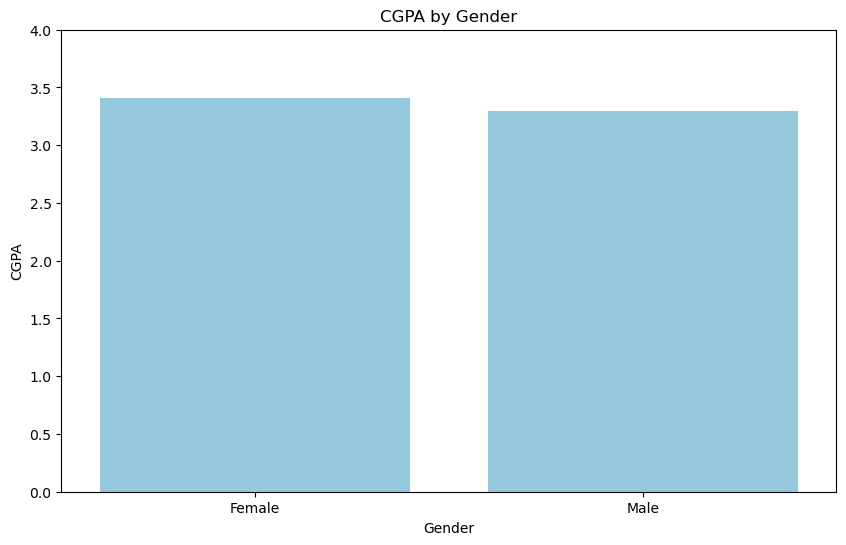

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='cgpa', data=data_cleaned_nan_snake, errorbar =None, color = "skyblue")
plt.title('CGPA by Gender')
plt.xlabel('Gender')
plt.ylabel('CGPA')
plt.ylim(0, 4)  # Assuming CGPA is on a 0-4 scale
plt.show()

11. As we can see the Female have slightly higer cgpa, but we have to bear in mind that the Female entries take 75% of the data so we conclude for sure that this is a factor.

<function matplotlib.pyplot.show(close=None, block=None)>

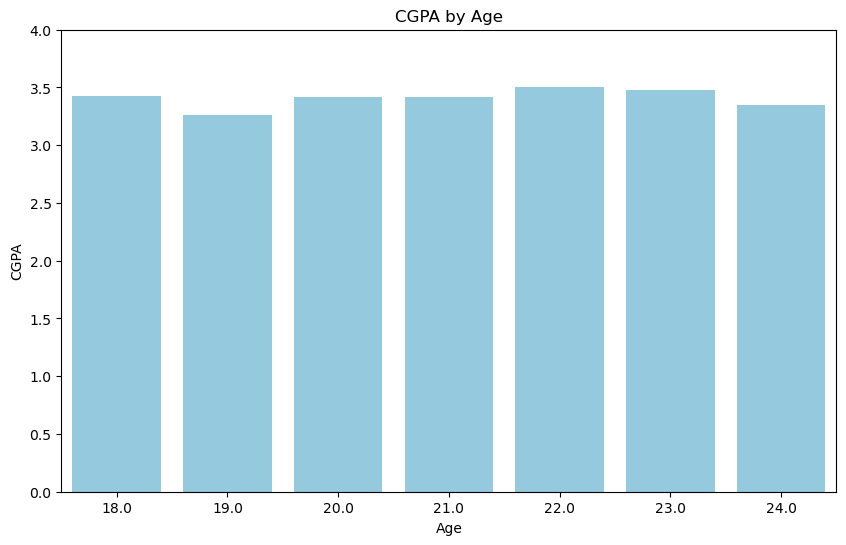

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='cgpa', data=data_cleaned_nan_snake, errorbar =None, color = "skyblue")
plt.title('CGPA by Age')
plt.xlabel('Age')
plt.ylabel('CGPA')
plt.ylim(0, 4)  # Assuming CGPA is on a 0-4 scale
plt.show

12. Here again we can see that the CGPA is high across all ages, again we cannot see large differences between different years and bear in mind the distribution of the CGPA and the entries for the ages are not even so once again we cannot conclude for certain that this is a factor.

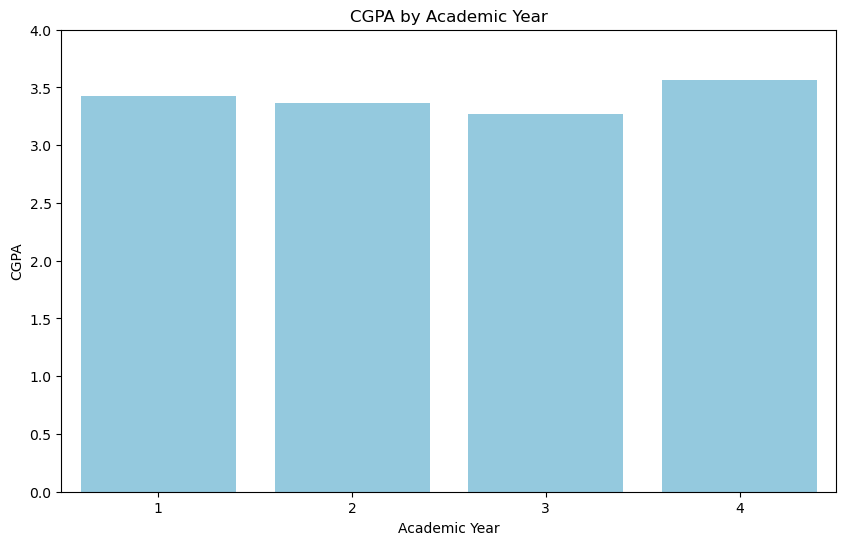

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='cgpa', data=data_cleaned_nan_snake, errorbar =None, color = "skyblue")
plt.title('CGPA by Academic Year')
plt.xlabel('Academic Year')
plt.ylabel('CGPA')
plt.ylim(0, 4)  # Assuming CGPA is on a 0-4 scale
plt.show()

13. Again we can see somewhat equal cgpa, again brought down to the high skewness of the data entries. Bear in mind again the 4th year only has 8 entires, but still it's not significantly higher or lower than the rest of the years. They all show consistency above CGPA 3.0
14. To summarize these plots, we cannot say for certain how different demographic factors affect the cgpa as the CGPA is high all around and the entries are not evenly distributed
15. Let's now see whether the department has any affect on the mental health as one of my assumptions is that engineering courses tend to more mental health problems.

In [111]:
depression_yes = data_cleaned_nan_snake[data_cleaned_nan_snake['depression'] == 'Yes']
anxiety_yes = data_cleaned_nan_snake[data_cleaned_nan_snake['anxiety'] == 'Yes']
panic_yes = data_cleaned_nan_snake[data_cleaned_nan_snake['panic'] == 'Yes']

# Calculate the order of courses by descending count for each condition
depression_order = depression_yes['course'].value_counts().index
anxiety_order = anxiety_yes['course'].value_counts().index
panic_order = panic_yes['course'].value_counts().index

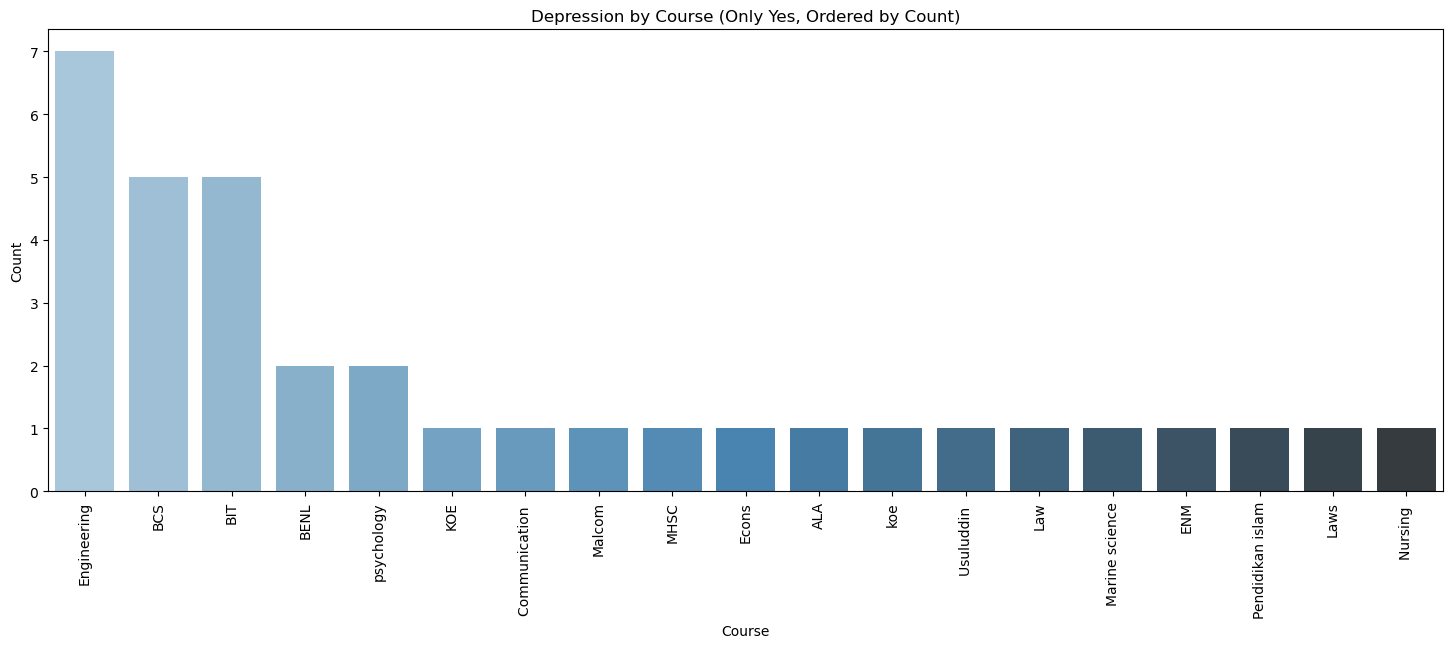

In [113]:
plt.figure(figsize=(18, 6))
sns.countplot(x='course', data=depression_yes, palette='Blues_d', order=depression_order)
plt.title('Depression by Course (Only Yes, Ordered by Count)')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

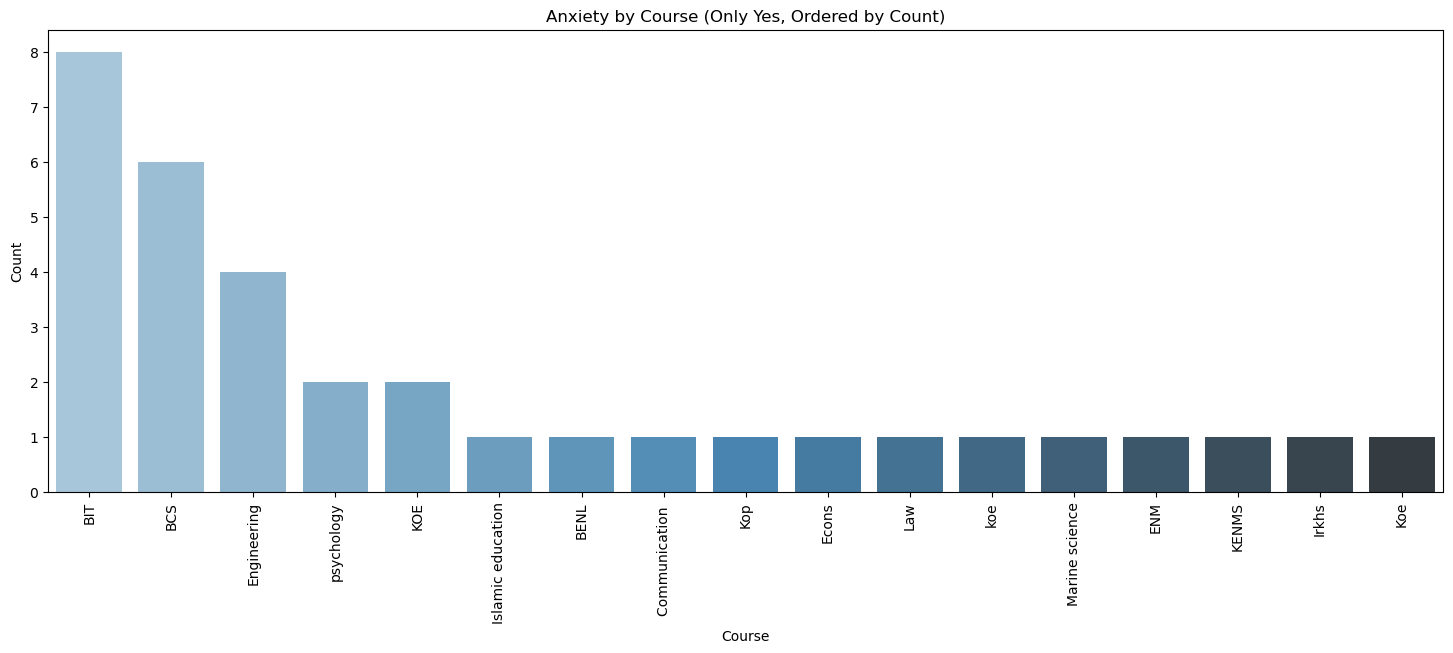

In [114]:
plt.figure(figsize=(18, 6))
sns.countplot(x='course', data=anxiety_yes, palette='Blues_d', order=anxiety_order)
plt.title('Anxiety by Course (Only Yes, Ordered by Count)')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

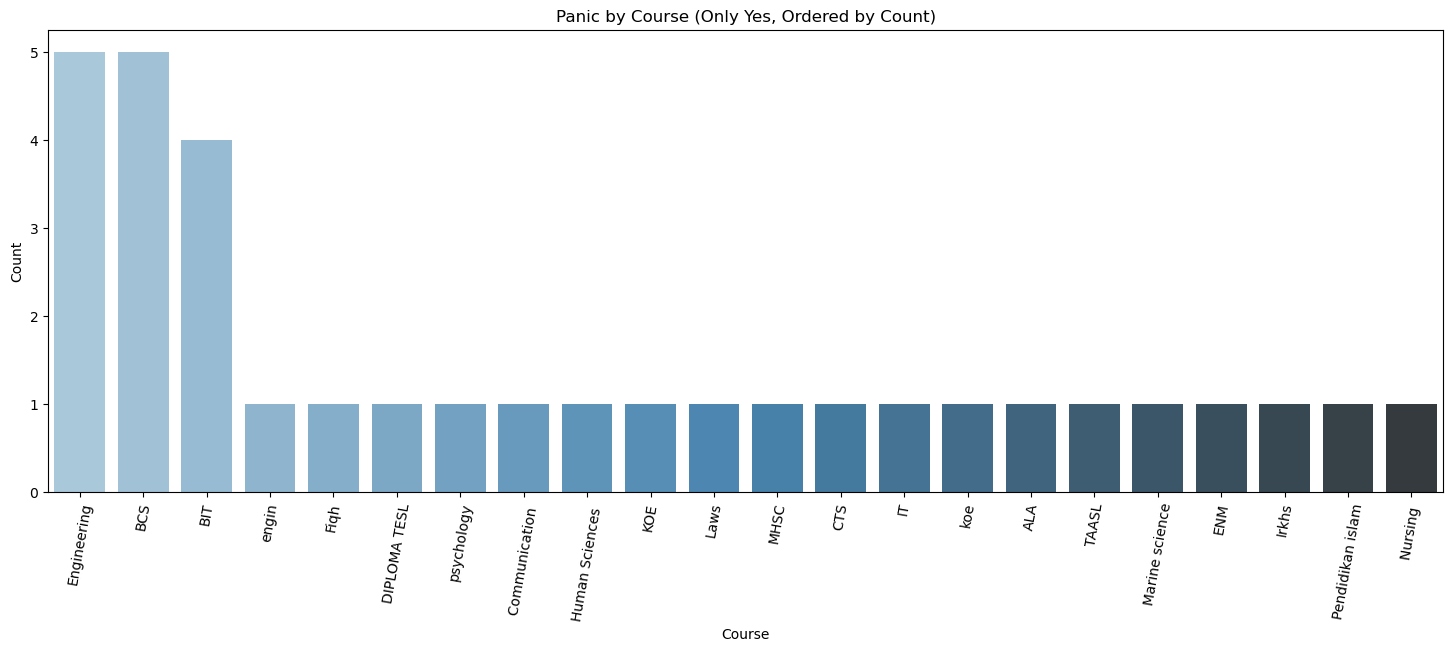

In [115]:
plt.figure(figsize=(18, 6))
sns.countplot(x='course', data=panic_yes, palette='Blues_d', order=panic_order)
plt.title('Panic by Course (Only Yes, Ordered by Count)')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

In [116]:
data_cleaned_nan_snake.course.value_counts()

course
BCS                        18
Engineering                17
BIT                         9
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Hum

16. From all the information we can see that most of the course entries are Bachelor of Computer Science(BCS), Engineering and Bachelor of Information Technology. Most of them have only one entry. Yes we can see from the plots that the Engineering and BIT and BCS hold the highest depression panic and anxiety value but they are also the ones with most entries. We cannot conclude that engineering courses have effect on the mental health as the other courses we see on the plots only have one entry and it states depression so we cannot know for sure if we add more data to these courses, whether it's gonna have a huge rise or not.
17. To summarize this finding, we cannot conlcude that engineering courses are more depressing than others, for this we would need further analysis on other datasets if we could find or to do a survey ourselves, but this for another time.

# **4. Summary**

After this data exploration of both datasets we saw some interesting findings, got expected results and some unexpected results, but also using only this data we couldn't conclude some of the questions we initially asked. Let's revisit the conclusions from both explorations and the initial questions and then make a combined conclusion.

The initial questions we asked are:
- Which factors(age,academic year, gender, course) affect the mental health
- Does the mental health affect the CGPA.
- Which factors outside the mental health affect the CGPA.
- Whether the department has any effect on mental health based on my presumptions that engineering students suffer more from mental health problems

**1. From the first data we concluded that:**
- **Demographic factors over mental health(gender, age, academic year )**: In general across all three mental health indicators (anxiety, stress, and depression), females consistently report higher values than males, indicating that female students in this dataset experience more significant mental health challenges. But we have to keep in mind that female entries are less than the male entries in our data, but the entries are substantial and the findings likely reflect real differences. Anxiety, stress, and depression levels tend to peak in the middle academic years (particularly the 2nd and 3rd years) and decrease slightly in the final year. This pattern suggests that the middle years of university may be particularly challenging for students. Younger students, particularly those around 20 years old, report higher levels of anxiety, stress, and depression. These values decrease slightly as students get older. But the entires for the age of 28 raise concerns about potential bias and the reliability of conclusions drawn about age-related differences in mental health indicators as the entries are not enough and are insignificant compared with the other ones so we have got to be really cautious. We can still see a trend that the age of 25 are less depressed and stressed than 20 year olds.
- **Department's influence over mental health**: Civil Engineering is the department with highest levels of stress, anxiety and depression. Contrary to my opinion non-engineering sciences have higher stress,anxiety and depression values than some engineering sciences like Mechanical or CS Engineering. Departments like Environmental/Life Sciences and CS/IT Engineering show comparatively lower levels of these challenges, though they are still significant. All sciences have significant levels of mental challenges, with Civil Engineering always taking the first spot followed by EEE Engineering and Business and Enterpreneureship.
- **Mental health on CGPA AND Demographic ON CGPA** : CGPA is not strongly influenced by the factors we've measured, such as mental health variables, or that these factors account for only a small part of the variance in CGPA. It’s possible that while mental health and related factors do have some impact on CGPA, their overall influence might be modest. Students' academic performance could be more strongly influenced by other factors not captured in our dataset. The way certain factors are measured might affect their relationship with CGPA. For example, self-reported mental health symptoms might not perfectly capture the actual mental health status or its impact on academic performance. There could be other important factors influencing CGPA that aren't included in our dataset Even though the effects of mental health variables on CGPA might be modest, they can still be meaningful, particularly if they are statistically significant. For instance, identifying that (Age, scholarship, nervousness, trouble relaxing, inadequate coping, top performance, angered by performance, fatigue, and self-doubt) were found to be statistically significant predictors of CGPA with a small but real impact on academic performance, which could be important for targeted interventions, even if these factors only explain a small portion of the overall variance. Our findings suggest that while certain factors like mental health have some influence on CGPA, their overall impact may be modest. This could be due to a combination of the inherent complexity and randomness of academic performance, the limited influence of the measured factors, or the possibility that other unmeasured factors play a more significant role.

**2. From the second data we concluded that:**
- **Demographic factors over mental health** : Based on what we see it looks like the age of 18 is the year with most depressed students, but this could also be biased by the fact that the number of entries for 18 years old are the most of all the entries. But it could be seen that: 18 and 19-year-olds seem to be the most affected age groups across depression, anxiety, and panic, with a high overall student count and a significant proportion experiencing mental health challenges. 24-year-olds also show a high count of students, but a lower proportion of them are reporting mental health issues compared to the younger age groups. These findings could suggest that younger students, particularly those aged 18 and 19, are more vulnerable to mental health challenges, potentially due to the pressures of transitioning into higher education or other life changes.
- **Demographic factors over mental health** :  The dataset is skewed towards females, with three times as many female respondents as male respondents. This difference in sample size can influence the results, making it appear that mental health issues are more prevalent among females simply because there are more females in the dataset. Both genders report experiencing depression, but the proportion is higher among females. However, given the larger number of females in the dataset, this might partially reflect the sample distribution rather than a true gender difference. Anxiety and panic are reported more frequently by females than males. This could indicate a higher prevalence of these conditions among females in the sample, or it could again be a reflection of the sample size difference.
- **Demographic factors over mental health** : What we see here is again a distribution skewed to the first year, 4th year has only 8 entries, but still we can compare the first three years to get some insight. 1st-Year Students: This group has the highest number of students and also the highest number reporting depression, anxiety, and panic. This suggests that the transition into university life may be particularly challenging, contributing to higher levels of reported mental health issues. 2nd and 3rd-Year Students: These groups show a relatively steady level of mental health issues, with a slight decline compared to the 1st year. The reported levels of depression, anxiety, and panic are still significant but not as high as in the 1st year. The 4th year has the fewest students and the lowest levels of reported mental health issues. This could indicate that students who make it to the final year might have better coping mechanisms, or it could reflect a smaller, possibly less representative sample size. This analysis indicates that mental health challenges are more commonly reported among 1st-year students, potentially due to the stress associated with transitioning to university life. The findings for 2nd and 3rd-year students suggest ongoing but slightly reduced challenges But we shall always consider the fact that the entries aren't equal and more entries would help benefit the analysis. It seems from the plots that younger students in first years of education suffer more mentally than the older ones, but we have to keep in mind that the entries are not evenly distributed and this could affect the outcome. We cannot say about gender as the distribution is really skewed towards females and that is potential bias.
- **Mental health on CGPA** : Based on all we see there are almost 70/30 distributed and from the plots we can see: The average CGPA for students who report depression is very close to those who do not, suggesting that depression does not have a significant impact on the CGPA within this dataset. Similar to depression, the average CGPA for students who report anxiety is almost identical to those who do not, indicating that anxiety might not significantly affect the CGPA. The CGPA for students reporting panic is also very close to those not reporting it, suggesting that panic does not have a noticeable impact on CGPA. These findings make it look like that depression, anxiety and panic do not significantly affect the CGPA, this could mean as in the previous data that the presence of these mental health challenges, students are able to maintain their academic performance, or my assumption is that the data is heavily skewed to the higher values and we cannot get clear perspective of whether it affects the CGPA or not.
- **Demographic factors on CGPA** : As we can see the Female have slightly higer cgpa, but we have to bear in mind that the Female entries take 75% of the data so we conclude for sure that this is a factor.
Here again we can see that the CGPA is high across all ages, again we cannot see large differences between different years and bear in mind the distribution of the CGPA and the entries for the ages are not even so once again we cannot conclude for certain that this is a factor.
Again we can see somewhat equal cgpa, again brought down to the high skewness of the data entries. Bear in mind again the 4th year only has 8 entires, but still it's not significantly higher or lower than the rest of the years. They all show consistency above CGPA 3.0
To summarize these plots, we cannot say for certain how different demographic factors affect the cgpa as the CGPA is high all around and the entries are not evenly distribu
- **Department's influence over mental health**: From all the information we can see that most of the course entries are Bachelor of Computer Science(BCS), Engineering and Bachelor of Information Technology. Most of them have only one entry. Yes we can see from the plots that the Engineering and BIT and BCS hold the highest depression panic and anxiety value but they are also the ones with most entries. We cannot conclude that engineering courses have effect on the mental health as the other courses we see on the plots only have one entry and it states depression so we cannot know for sure if we add more data to these courses, whether it's gonna have a huge rise or not. To summarize this finding, we cannot conlcude that engineering courses are more depressing than others, for this we would need further analysis on other datasets if we could find or to do a survey ourselves.ted

# **5. Conclusion **

After examining the two datasets we came across some answers.
1. Which factors(age,academic year, gender) affect the mental health.
- I have found that in both datasets females tend to have higher stress, anxiety and depression. The first set has smaller proportion of females and the second has a dominant proportion of females and both show that females suffer more from mental health problems during studying.
- From both datasets I concluded that younger students around the age of 20 (18-20) have higher levels of stress, anxiety and depression.
- I could not conclude for sure which academic year has the most effect on the mental health as the first dataset states that it's the middle years and the second states that it's the first year. 
  
2. Does the mental health affect the CGPA.
- From both datasets we concluded that Mental Health has some marginal effect over the students's CGPA, as I have found that only some factors connected with the mental health have effect on the CGPA. Interesting enough it's not exactly the depression, stress or anxiety but other factors that we can connect with them.
- **Nervousness** has a negative effect on the student's CGPA, it's pretty intuitive that it leads to lower results overall
- **Trouble relaxing** has a positive effect on the CGPA, we can assume that this is because the student is working hard and has no time to relax, which leads to higher grades but could potentially lead to other mental problems, so this should not be taken as a positive in my opinion and should be analysed further.
- **Inadequate coping** has a positive effect on CGPA, my assumption is that students who feel they are not coping well with stress or challenges might overcompensate by working harder, studying more, or seeking additional help. This also sounds pretty counter intuitive and should be analysed more.
- **Top performance** has a negative effect, which sounds really counterintuitive and should be looked into further. This could be brought down to overconfidence or having too high of expectations, but it should be analysed further.
- **Angered by performance** has a negative impact on the CGPA, which sounds intuitive, I assume that a student could be angered as the CGPA is already low or just the anger makes it harder to study.
- **Fatigue** has a positive effect on CGPA, this is pretty counterintuitive and should be looked into. I assume that fatigue could be a sign of students pushing themselves hard— studying late, engaging in intense academic activities, or taking on heavy course loads.
- **Self-Doubt** has a negative effect which is pretty intuitive and helps understand how doubting yourself leads to lower results.
3. Which factors outside the mental health affect the CGPA.
- First dataset showed us that age and having a scholarship affect the CGPA, age affects it negatively and scholarship affects it positively. The second data didn't give us a concrete answer. Further analysis could be beneficial as these answers could really help benefit the students.

4. Whether the department has any effect on mental health based on my presumptions that engineering students suffer more from mental health problems
- From the first dataset we saw that Civil Engineering has the highest levels of menatl health challenges, but we also saw that not only engineering sciences have high levels of stress, anxiety and depression. The second dataset didn't give us a concrete answer as the entries were heavily skewed towards the engineering sciences.
- We cannot conclude that Non-Engineering sciences neccesseraly temd to be less stressful than the Engineering ones, but we can conclude that Engineering sciences tend to have high levels of stress.

In conclusion, after examining the two datasets we have found answers to some of our questions. The important question of whether the mental health has an effect on the CGPA should be analysed further with more data as there could be other important factors influencing CGPA that aren't included in our dataset.The ur findings may sometimes be counterintuitive, so further work could be done. The datasets available would sometimes not allow for reliable analysis so in the future better analysis can be done on a broader dataset. 